In [207]:
import numpy as npF
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score

from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

In [208]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.5f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 10]
# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [209]:
df= pd.read_csv('bank-full.csv')

In [210]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

# Deliverable – 1 (Exploratory data quality report reflecting the following)

### 1. Univariate analysis

In [211]:
#There are 45211 rows
df.shape

(45211, 17)

In [212]:
#Most of the fields are object i.e Categorical and rest are integer fileds 
#and also there are no integer columns where has garbage data which will change datatype of integer to Object
#Looks fine at the first glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
#There are no missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [213]:
df.describe()

age       balance          day     duration     campaign  \
count 45,211.00000  45,211.00000 45,211.00000 45,211.00000 45,211.00000   
mean      40.93621   1,362.27206     15.80642    258.16308      2.76384   
std       10.61876   3,044.76583      8.32248    257.52781      3.09802   
min       18.00000  -8,019.00000      1.00000      0.00000      1.00000   
25%       33.00000      72.00000      8.00000    103.00000      1.00000   
50%       39.00000     448.00000     16.00000    180.00000      2.00000   
75%       48.00000   1,428.00000     21.00000    319.00000      3.00000   
max       95.00000 102,127.00000     31.00000  4,918.00000     63.00000   

             pdays     previous  
count 45,211.00000 45,211.00000  
mean      40.19783      0.58032  
std      100.12875      2.30344  
min       -1.00000      0.00000  
25%       -1.00000      0.00000  
50%       -1.00000      0.00000  
75%       -1.00000      0.00000  
max      871.00000    275.00000

In [9]:
profile = df.profile_report(html={'style':{'full_width':True}})    #syntax for v2.6 version of pandas_profiling that works with pandas v1.0+
profile

In [241]:
df.describe()

age       balance          day     duration     campaign  \
count 45,211.00000  45,211.00000 45,211.00000 45,211.00000 45,211.00000   
mean      40.93621   1,362.27206     15.80642    258.16308      2.76384   
std       10.61876   3,044.76583      8.32248    257.52781      3.09802   
min       18.00000  -8,019.00000      1.00000      0.00000      1.00000   
25%       33.00000      72.00000      8.00000    103.00000      1.00000   
50%       39.00000     448.00000     16.00000    180.00000      2.00000   
75%       48.00000   1,428.00000     21.00000    319.00000      3.00000   
max       95.00000 102,127.00000     31.00000  4,918.00000     63.00000   

             pdays     previous  
count 45,211.00000 45,211.00000  
mean      40.19783      0.58032  
std      100.12875      2.30344  
min       -1.00000      0.00000  
25%       -1.00000      0.00000  
50%       -1.00000      0.00000  
75%       -1.00000      0.00000  
max      871.00000    275.00000

# Displaying -Filed Description ,oultier and tail analysis in a Table

In [275]:
fieldDescription = {
  "age": "Age of the Customer",
  "balance": "Balance in Customers account",
  "day": "Last contact Day of the Month",
  "duration" :"Last contact duration, in seconds",
  "campaign":"Number of contacts performed during this campaign and for this client",
  "pdays":"Number of days that passed by after the client was last contacted from a previous campaign",
  "previous":"Number of contacts performed before this campaign and for this client",
  "job":"Type of job (management, technician, entrepreneur, blue-collar, etc.)",
  "marital":"marital status (married, single, divorced)",
  "education": "education level (primary, secondary, tertiary)",
   "default": "has credit in default?",
   "housing": "has housing loan?",
    "loan": "has personal loan?",
    "month": "last contact month of year", 
    "poutcome": "outcome of the previous marketing campaign",
    "Target": "Tell us has the client subscribed a term deposit. (Yes, No)",
    "contact": "contact communication type"
}

In [276]:
def findOutliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    median = df[column].quantile(0.50)
    mean=df[column].mean()
    IQR = Q3 - Q1
    skewed='NotSkewed';
    
    if(mean>median):
        skewed='RightSkewed'
    elif (mean<median):
        skewed='LeftSkewed'
    
    df_new = pd.DataFrame(columns=['Field','Description', 'Total No of Data','Min','Max','Mean','Median(Q2)','Std Dev','Q1','Q3','Total No of Missing','Total Number of Outliers','Skewed','Lowerbound','UpperBound','No of Outliers under lowerbound','No of Outliers above Upperbound'])
    df_new=df_new.append({'Field':column,
                             'Description':fieldDescription[column],
                             'Total No of Data':df[column].count()   ,
                              'Min':df[column].min()   ,
                              'Max':df[column].max()   ,
                              'Mean':mean,
                              'Median(Q2)':median,
                              'Std Dev':df[column].std(),
                              'Q1':Q1,
                              'Q3':Q3,
                              'Total No of Missing':df[column].isnull().sum(),
                             'Total Number of Outliers': df[(df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR))][column].count(),
                             'Lowerbound': Q1 - 1.5 * IQR,
                             'UpperBound': Q3 + 1.5 * IQR,
                             'No of Outliers under lowerbound':df[df[column] < (Q1 - 1.5 * IQR)][column].count(),
                             'No of Outliers above Upperbound' :df[df[column] > (Q3 + 1.5 * IQR)][column].count(),
                             'Skewed':skewed
                               },
                            ignore_index=True)
  
    return df_new

In [277]:
age_data=findOutliers('age')
balance_data=findOutliers('balance')
day_data=findOutliers('day')
duration_data=findOutliers('duration')
campaign_data=findOutliers('campaign')
pdays_data=findOutliers('pdays')
previous_data=findOutliers('previous')
pd.concat([age_data,balance_data,day_data,duration_data,campaign_data,pdays_data,previous_data])

Field                                        Description  \
0       age                                Age of the Customer   
0   balance                       Balance in Customers account   
0       day                      Last contact Day of the Month   
0  duration                  Last contact duration, in seconds   
0  campaign  Number of contacts performed during this campa...   
0     pdays  Number of days that passed by after the client...   
0  previous  Number of contacts performed before this campa...   

  Total No of Data    Min     Max        Mean  Median(Q2)     Std Dev  \
0            45211     18      95    40.93621    39.00000    10.61876   
0            45211  -8019  102127 1,362.27206   448.00000 3,044.76583   
0            45211      1      31    15.80642    16.00000     8.32248   
0            45211      0    4918   258.16308   180.00000   257.52781   
0            45211      1      63     2.76384     2.00000     3.09802   
0            45211     -1     871    40.19783    -1.00000   100.12875   
0            45211      0     275     0.58032     0.00000     2.30344   

         Q1          Q3 Total No of Missing Total Number of Outliers  \
0  33.00000    48.00000                   0                      487   
0  72.00000 1,428.00000                   0                     4729   
0   8.00000    21.00000                   0                        0   
0 103.00000   319.00000                   0                     3235   
0   1.00000     3.00000                   0                     3064   
0  -1.00000    -1.00000                   0                     8257   
0   0.00000     0.00000                   0                     8257   

        Skewed   Lowerbound  UpperBound No of Outliers under lowerbound  \
0  RightSkewed     10.50000    70.50000                               0   
0  RightSkewed -1,962.00000 3,462.00000                              17   
0   LeftSkewed    -11.50000    40.50000                               0   
0  RightSkewed   -221.00000   643.00000                               0   
0  RightSkewed     -2.00000     6.00000                               0   
0  RightSkewed     -1.00000    -1.00000                               0   
0  RightSkewed      0.00000     0.00000                               0   

  No of Outliers above Upperbound  
0                             487  
0                            4712  
0                               0  
0                            3235  
0                            3064  
0                            8257  
0                            8257

In [242]:
df.describe()

age       balance          day     duration     campaign  \
count 45,211.00000  45,211.00000 45,211.00000 45,211.00000 45,211.00000   
mean      40.93621   1,362.27206     15.80642    258.16308      2.76384   
std       10.61876   3,044.76583      8.32248    257.52781      3.09802   
min       18.00000  -8,019.00000      1.00000      0.00000      1.00000   
25%       33.00000      72.00000      8.00000    103.00000      1.00000   
50%       39.00000     448.00000     16.00000    180.00000      2.00000   
75%       48.00000   1,428.00000     21.00000    319.00000      3.00000   
max       95.00000 102,127.00000     31.00000  4,918.00000     63.00000   

             pdays     previous  
count 45,211.00000 45,211.00000  
mean      40.19783      0.58032  
std      100.12875      2.30344  
min       -1.00000      0.00000  
25%       -1.00000      0.00000  
50%       -1.00000      0.00000  
75%       -1.00000      0.00000  
max      871.00000    275.00000

# Unique Categorical Data

In [278]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [279]:
for col in df.columns:
    if (df[col].dtype=="object"):
        print("FieldName :",col),
        print("FieldDescription :",fieldDescription[col]),
        print(df[col].value_counts()),
        print("\n")
  

FieldName : job
FieldDescription : Type of job (management, technician, entrepreneur, blue-collar, etc.)
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


FieldName : marital
FieldDescription : marital status (married, single, divorced)
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


FieldName : education
FieldDescription : education level (primary, secondary, tertiary)
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


FieldName : default
FieldDescription : has credit in default?
no     44396
yes      815
Name: default, dtype: int64


FieldName : housing
FieldDescription : has housing loan?
yes    25130
no     20081
Name: housing, dtype: int64


FieldName : 

In [219]:
#There are 210 out of who 5289 have negative bank balance and have Term Deposit
len(df[(df['balance']<0) & df['Target']==1])

3766

# Visualizing Outliers and Distribution of Univariate Continous Data 

In [17]:
def plotHistBox(column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(df[column], ax=ax_box)
    sns.distplot(df[column], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')


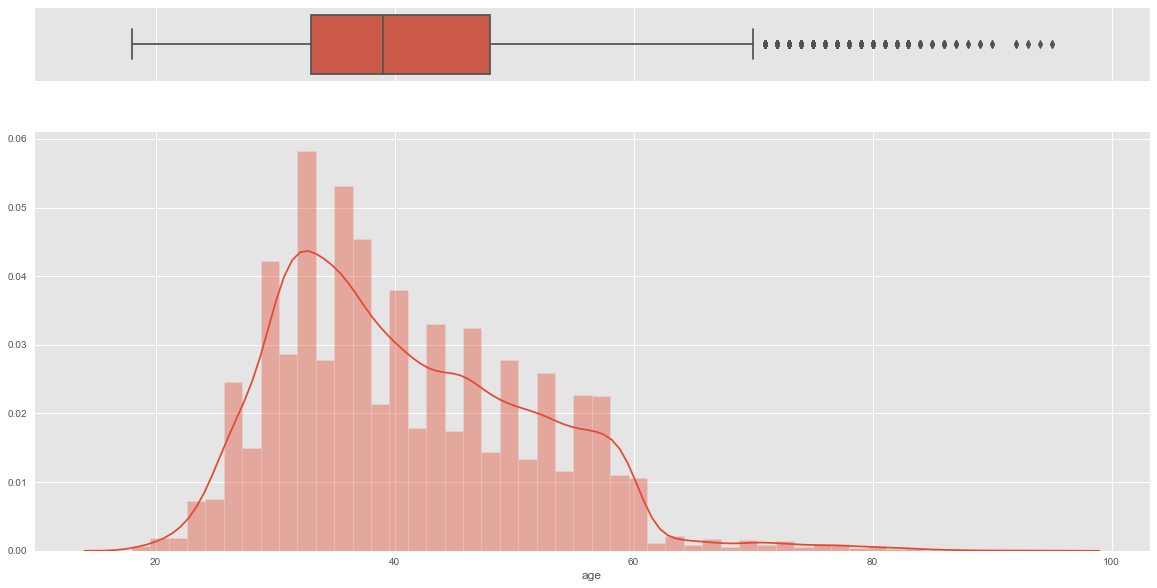

In [18]:

plotHistBox('age')

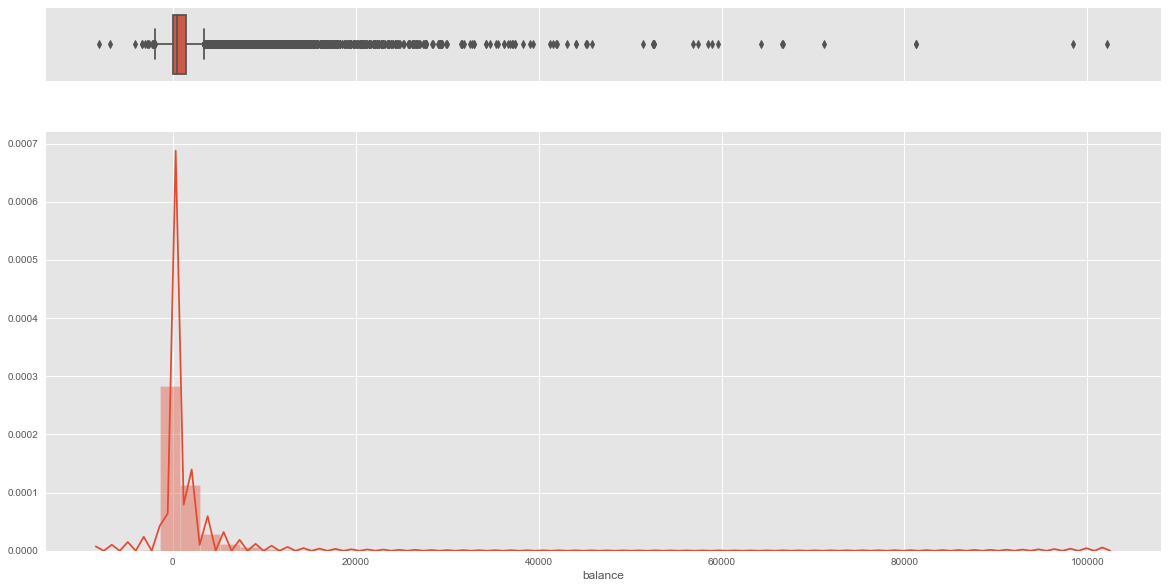

In [19]:
lotHistBox('balance')

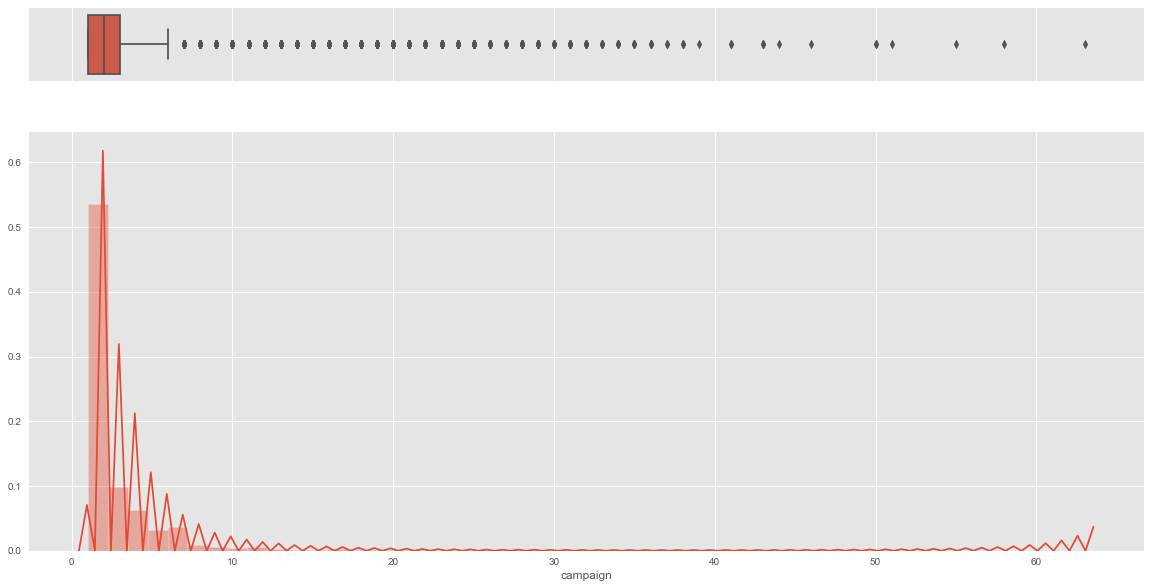

In [20]:
plotHistBox('campaign')

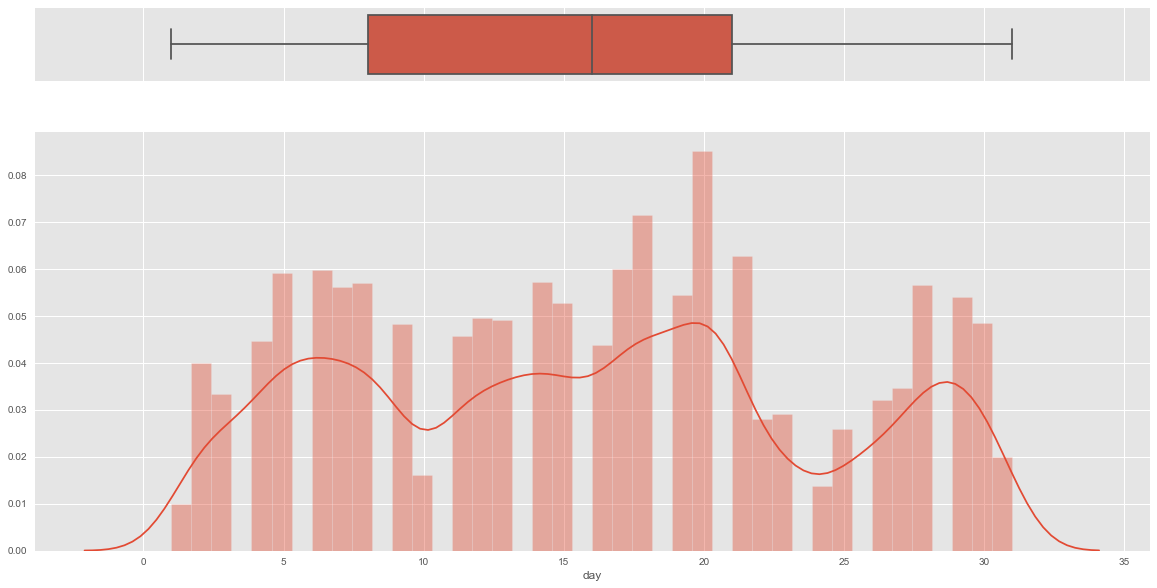

In [21]:
plotHistBox('day')

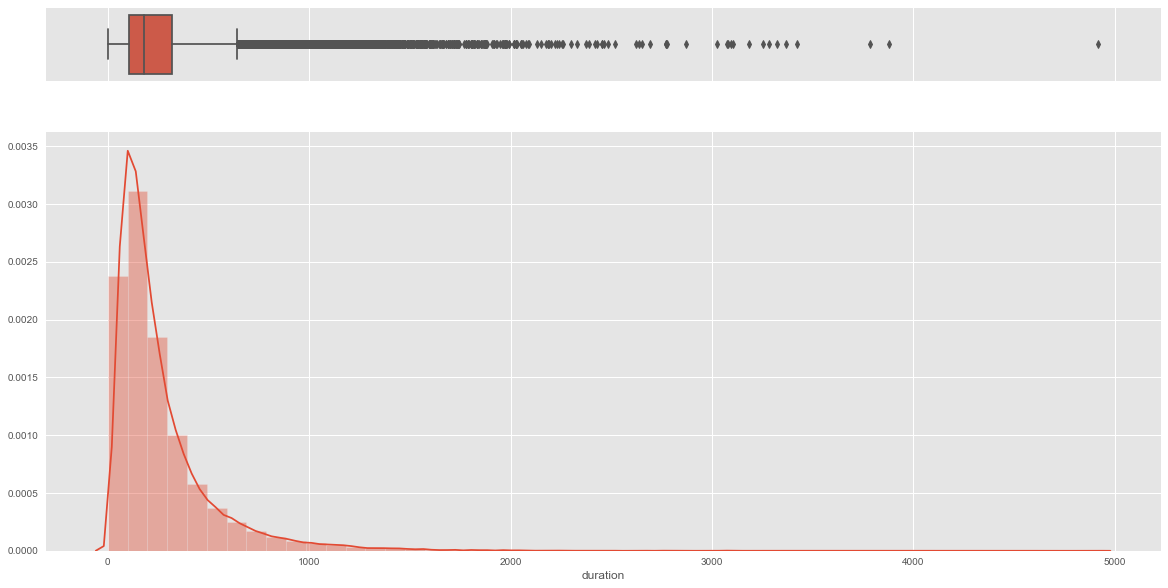

In [22]:
plotHistBox('duration')

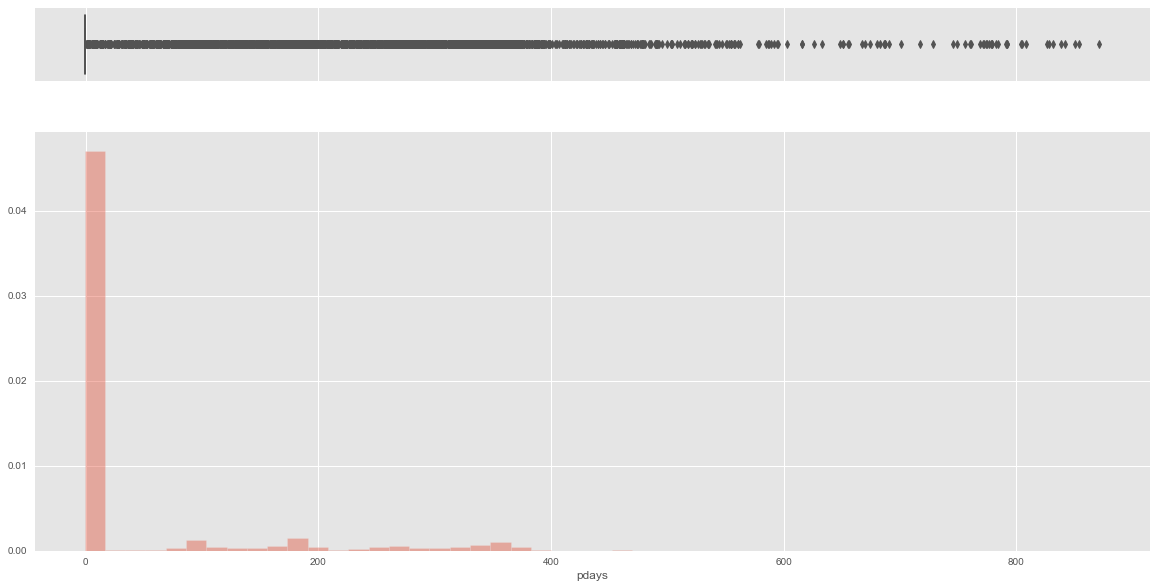

In [23]:
plotHistBox('pdays')

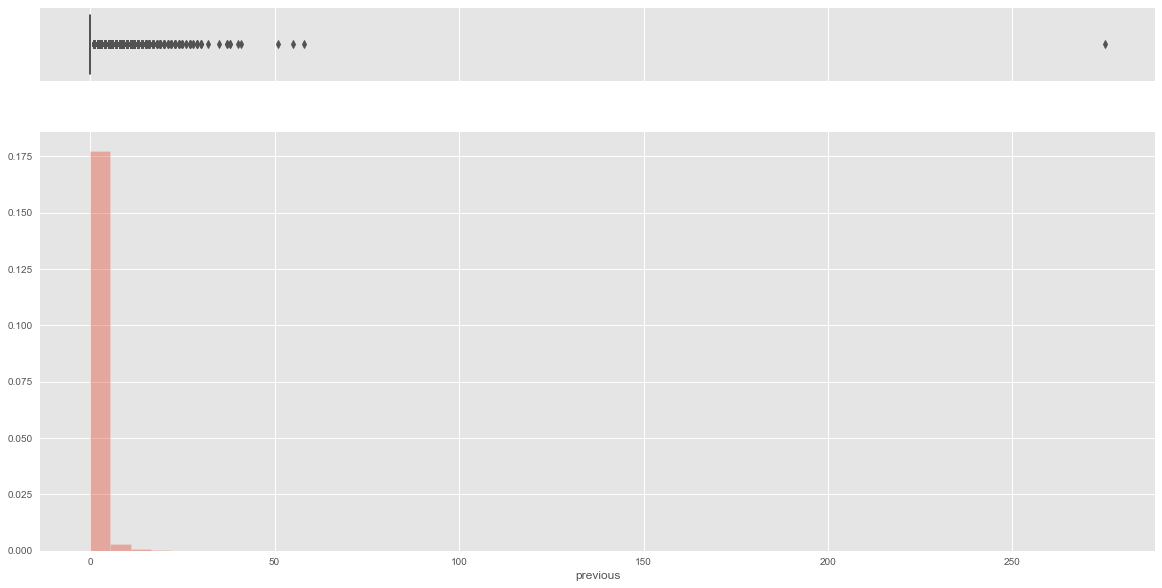

In [24]:
plotHistBox('previous')

In [220]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

# Univariate Analysis - Visualizing Categorical Data

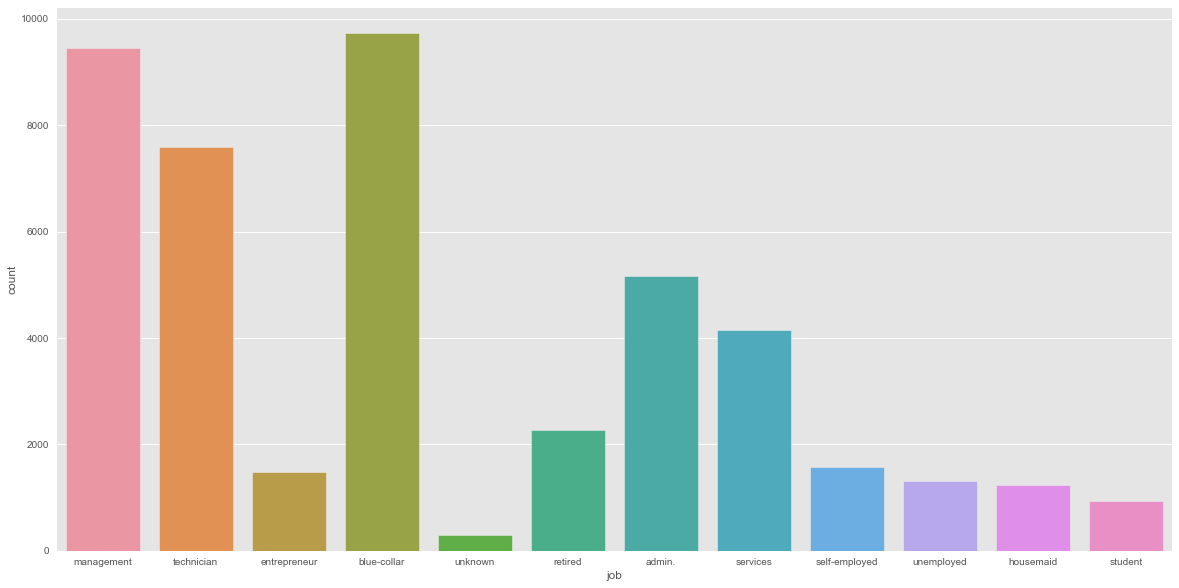

In [26]:
#Most of the people in Dataset are Blue collar and Management
sns.countplot(df["job"])

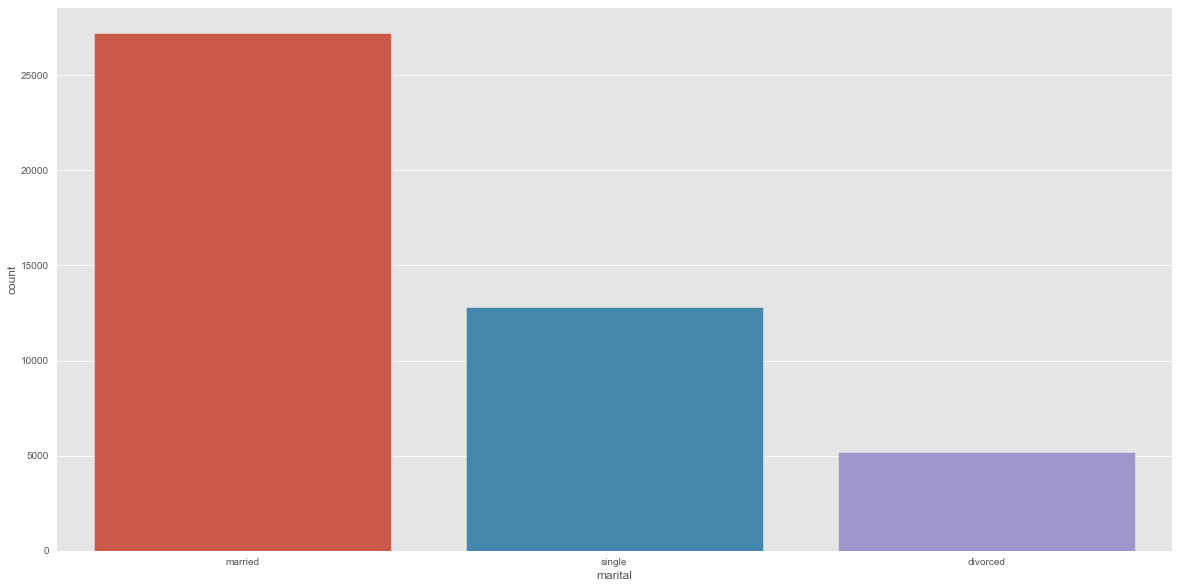

In [27]:
#Most of the people are married in dataset
sns.countplot(df["marital"])

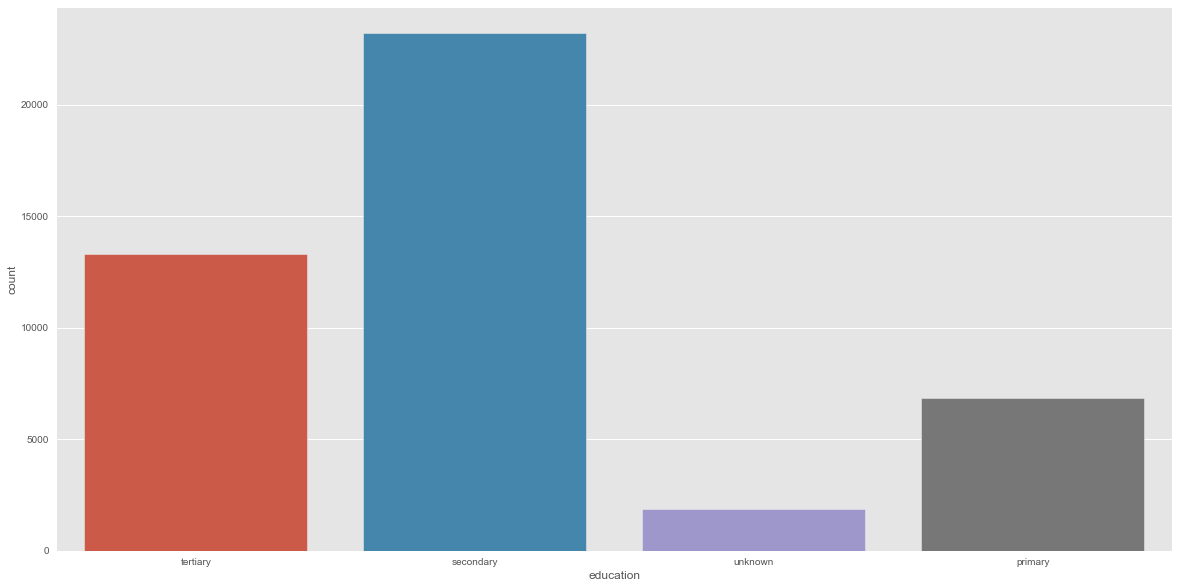

In [28]:
#Most of the people in Dataset have secondary education
sns.countplot(df['education'])

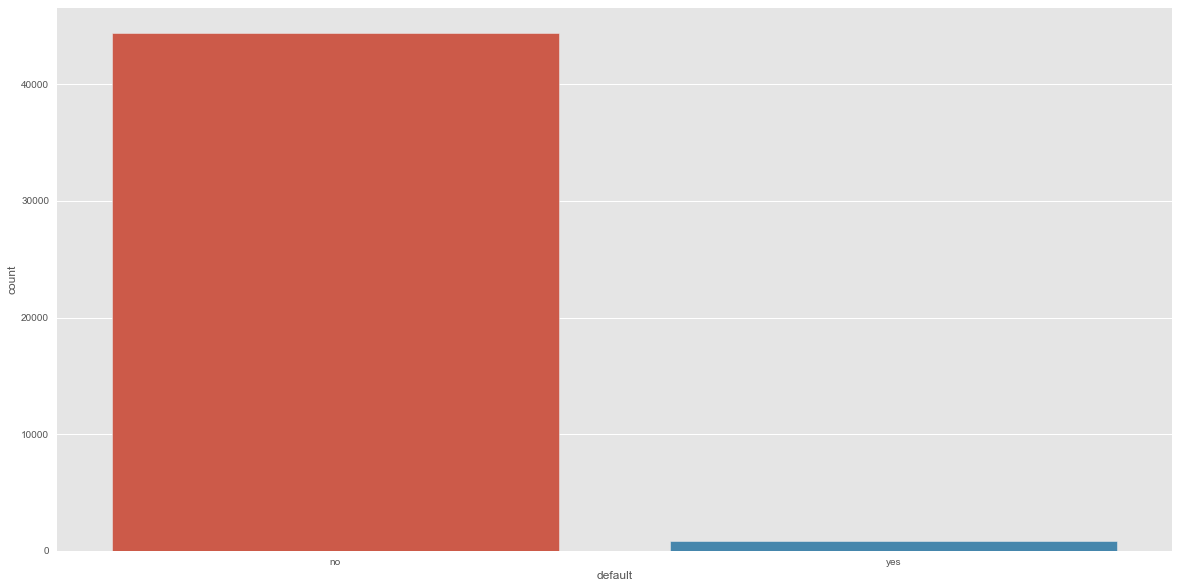

In [29]:
#Most of the people in Dataset has credit in default
sns.countplot(df['default'])

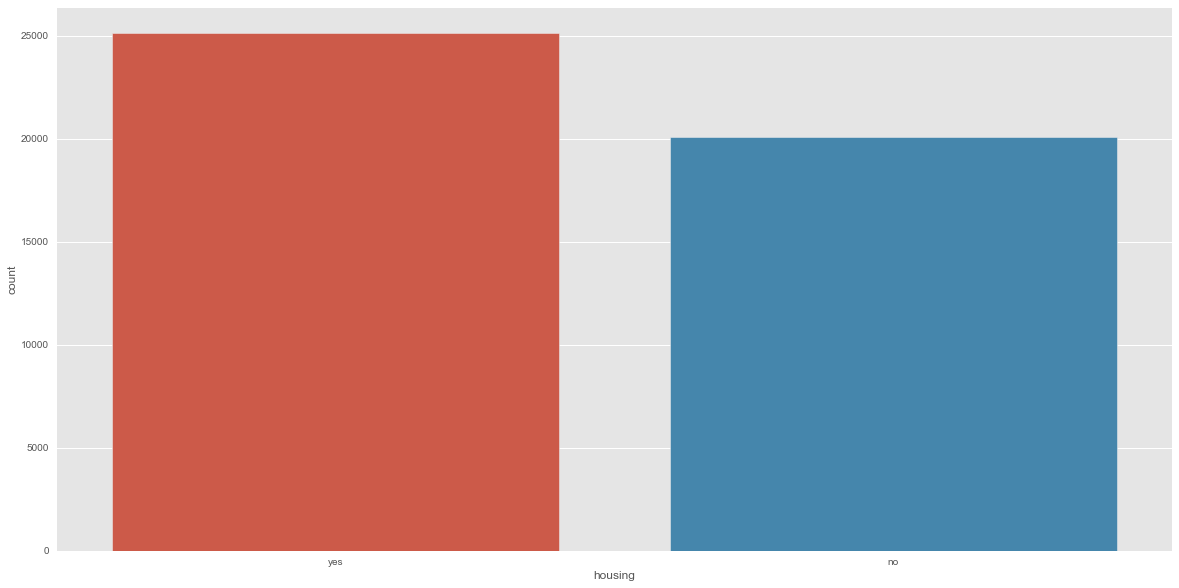

In [30]:
#Most of the people in Dataset have housing loan
sns.countplot(df['housing'])

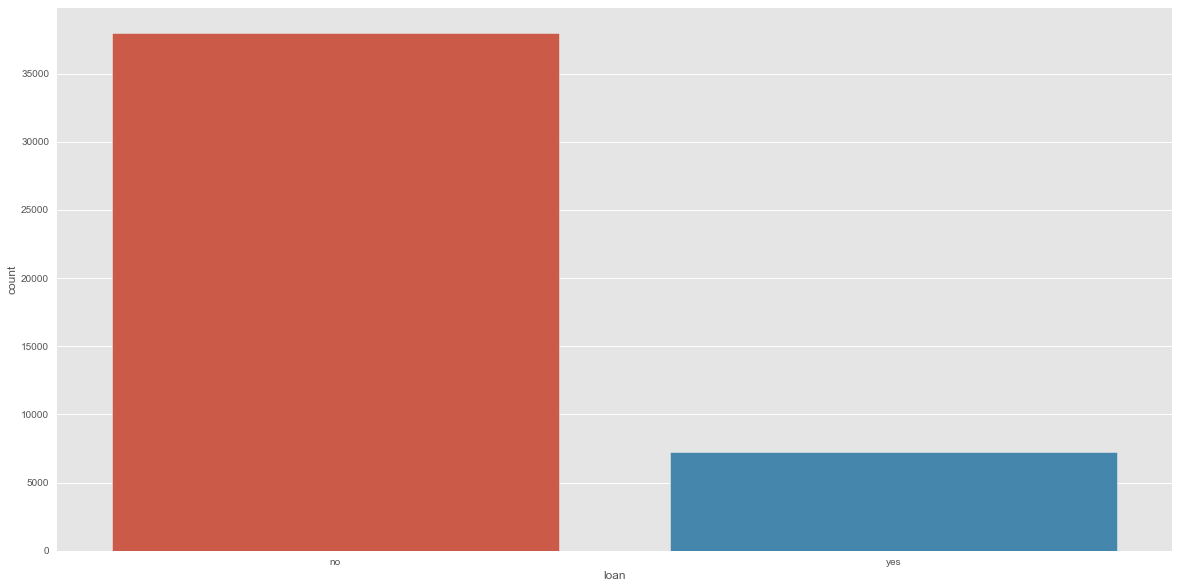

In [31]:
#Most of the people in Dataset have no personal loan
sns.countplot(df['loan'])

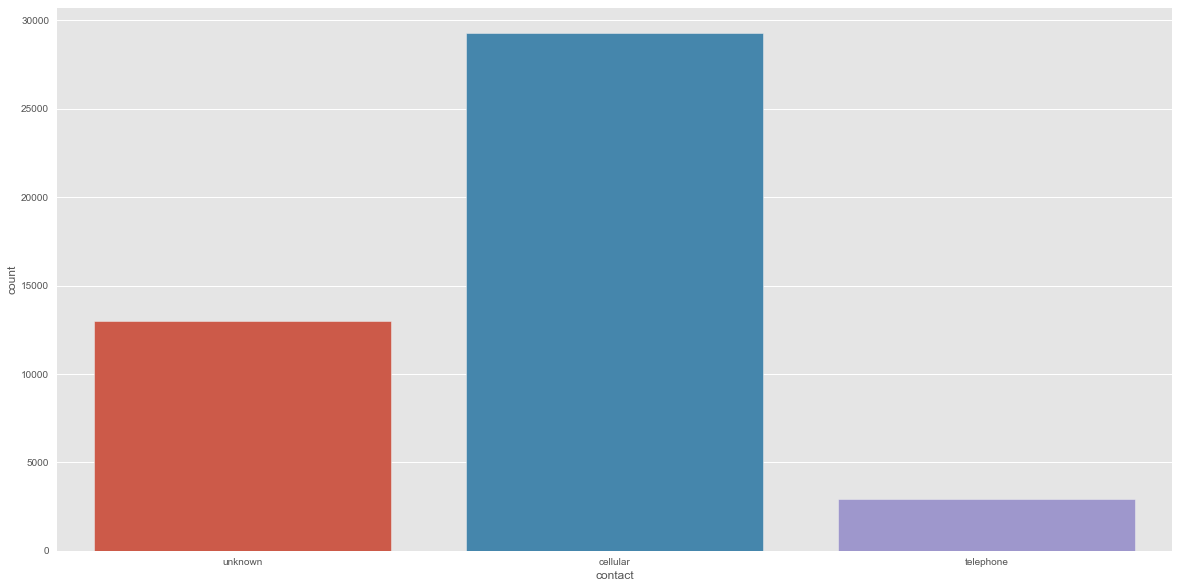

In [32]:
#Most of the people were contacted over the phone
sns.countplot(df['contact'])

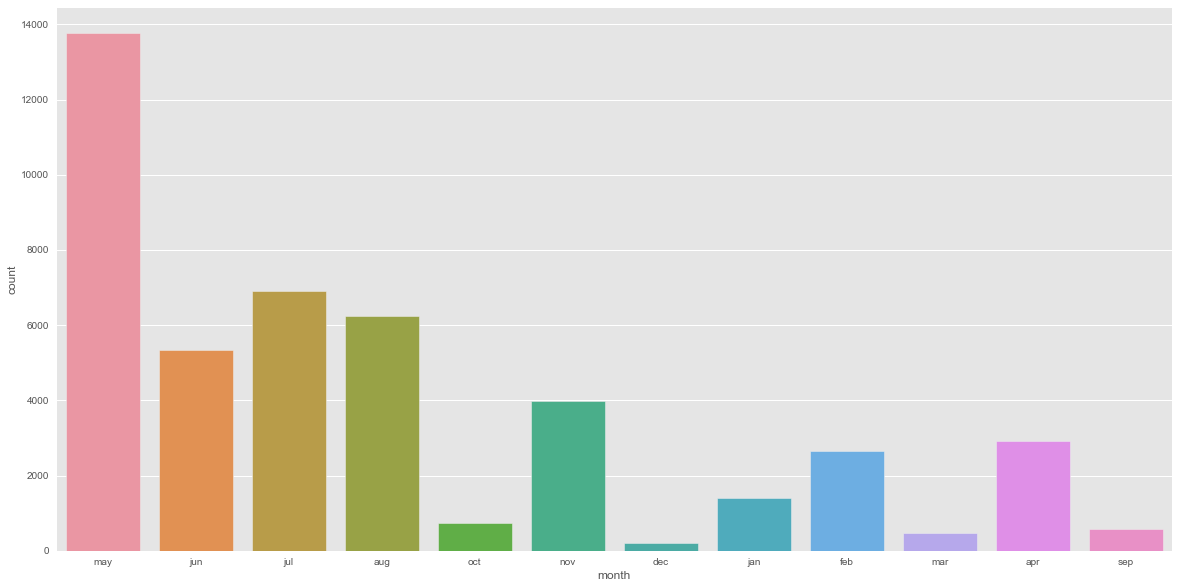

In [33]:
#Most of the people in Dataset were contacted in the month of May
sns.countplot(df['month'])

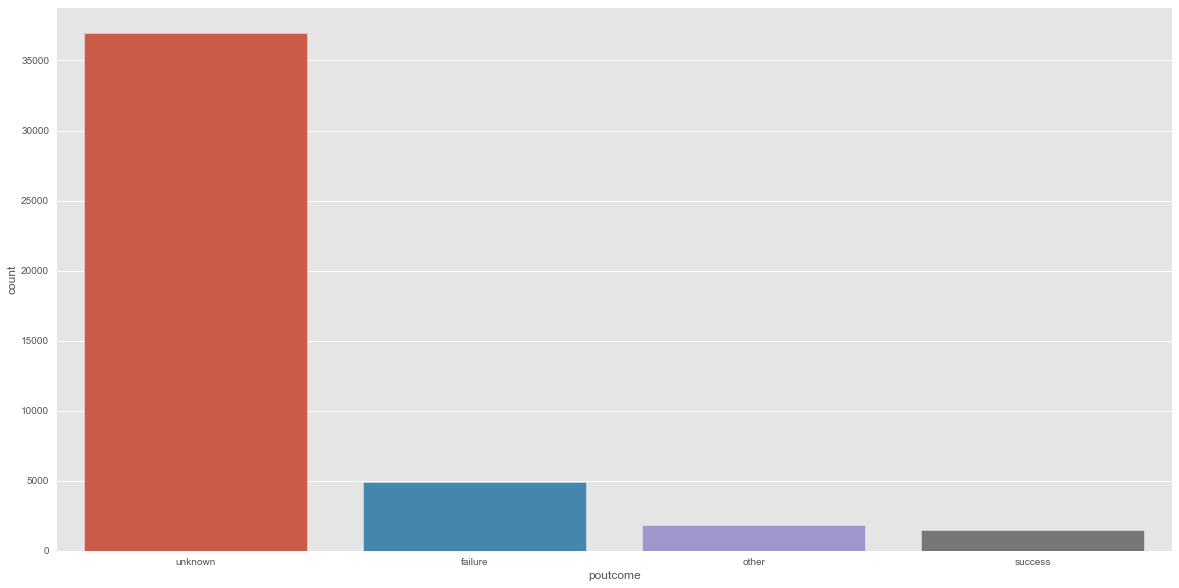

In [34]:
#Most of the previous outcome in Dataset are unknow
sns.countplot(df['poutcome'])

# Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment

1)There are no missing values in the data
2)WIll be applying Feature Scaling technique (StandardSCaler) to get all the data to same scale as Balance field has bigger vlaues than other fields
3)Will keep outliers as is ,as only LogisticRegression are sensitive to outliers.Will run Ensemble techniques like RandomForest,XgBoost to check the model with outliers
4)Will be replace yes to 1 and no to 0 in all the columns to make them numeric fields instead of Object
5)Will convert categorical data to numeric using dummies before fitting the data to the model

# Multivariate analysis

In [280]:
#Replace all the yes with 1 and no with 0
df.replace({"yes": 1, "no": 0},inplace=True)

In [281]:
df.corr()

age  default  balance  housing     loan      day  duration  \
age       1.00000 -0.01788  0.09778 -0.18551 -0.01566 -0.00912  -0.00465   
default  -0.01788  1.00000 -0.06675 -0.00603  0.07723  0.00942  -0.01002   
balance   0.09778 -0.06675  1.00000 -0.06877 -0.08435  0.00450   0.02156   
housing  -0.18551 -0.00603 -0.06877  1.00000  0.04132 -0.02798   0.00508   
loan     -0.01566  0.07723 -0.08435  0.04132  1.00000  0.01137  -0.01241   
day      -0.00912  0.00942  0.00450 -0.02798  0.01137  1.00000  -0.03021   
duration -0.00465 -0.01002  0.02156  0.00508 -0.01241 -0.03021   1.00000   
campaign  0.00476  0.01682 -0.01458 -0.02360  0.00998  0.16249  -0.08457   
pdays    -0.02376 -0.02998  0.00344  0.12418 -0.02275 -0.09304  -0.00156   
previous  0.00129 -0.01833  0.01667  0.03708 -0.01104 -0.05171   0.00120   
Target    0.02516 -0.02242  0.05284 -0.13917 -0.06819 -0.02835   0.39452   

          campaign    pdays  previous   Target  
age        0.00476 -0.02376   0.00129  0.02516  
default    0.01682 -0.02998  -0.01833 -0.02242  
balance   -0.01458  0.00344   0.01667  0.05284  
housing   -0.02360  0.12418   0.03708 -0.13917  
loan       0.00998 -0.02275  -0.01104 -0.06819  
day        0.16249 -0.09304  -0.05171 -0.02835  
duration  -0.08457 -0.00156   0.00120  0.39452  
campaign   1.00000 -0.08863  -0.03286 -0.07317  
pdays     -0.08863  1.00000   0.45482  0.10362  
previous  -0.03286  0.45482   1.00000  0.09324  
Target    -0.07317  0.10362   0.09324  1.00000

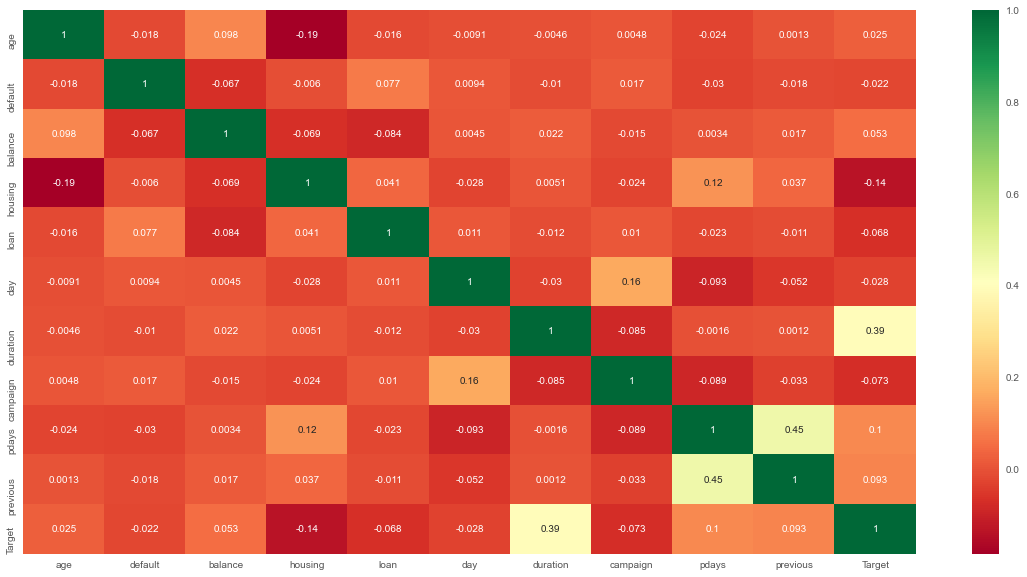

In [36]:
#Dont see any strong correlation with any of the fields
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

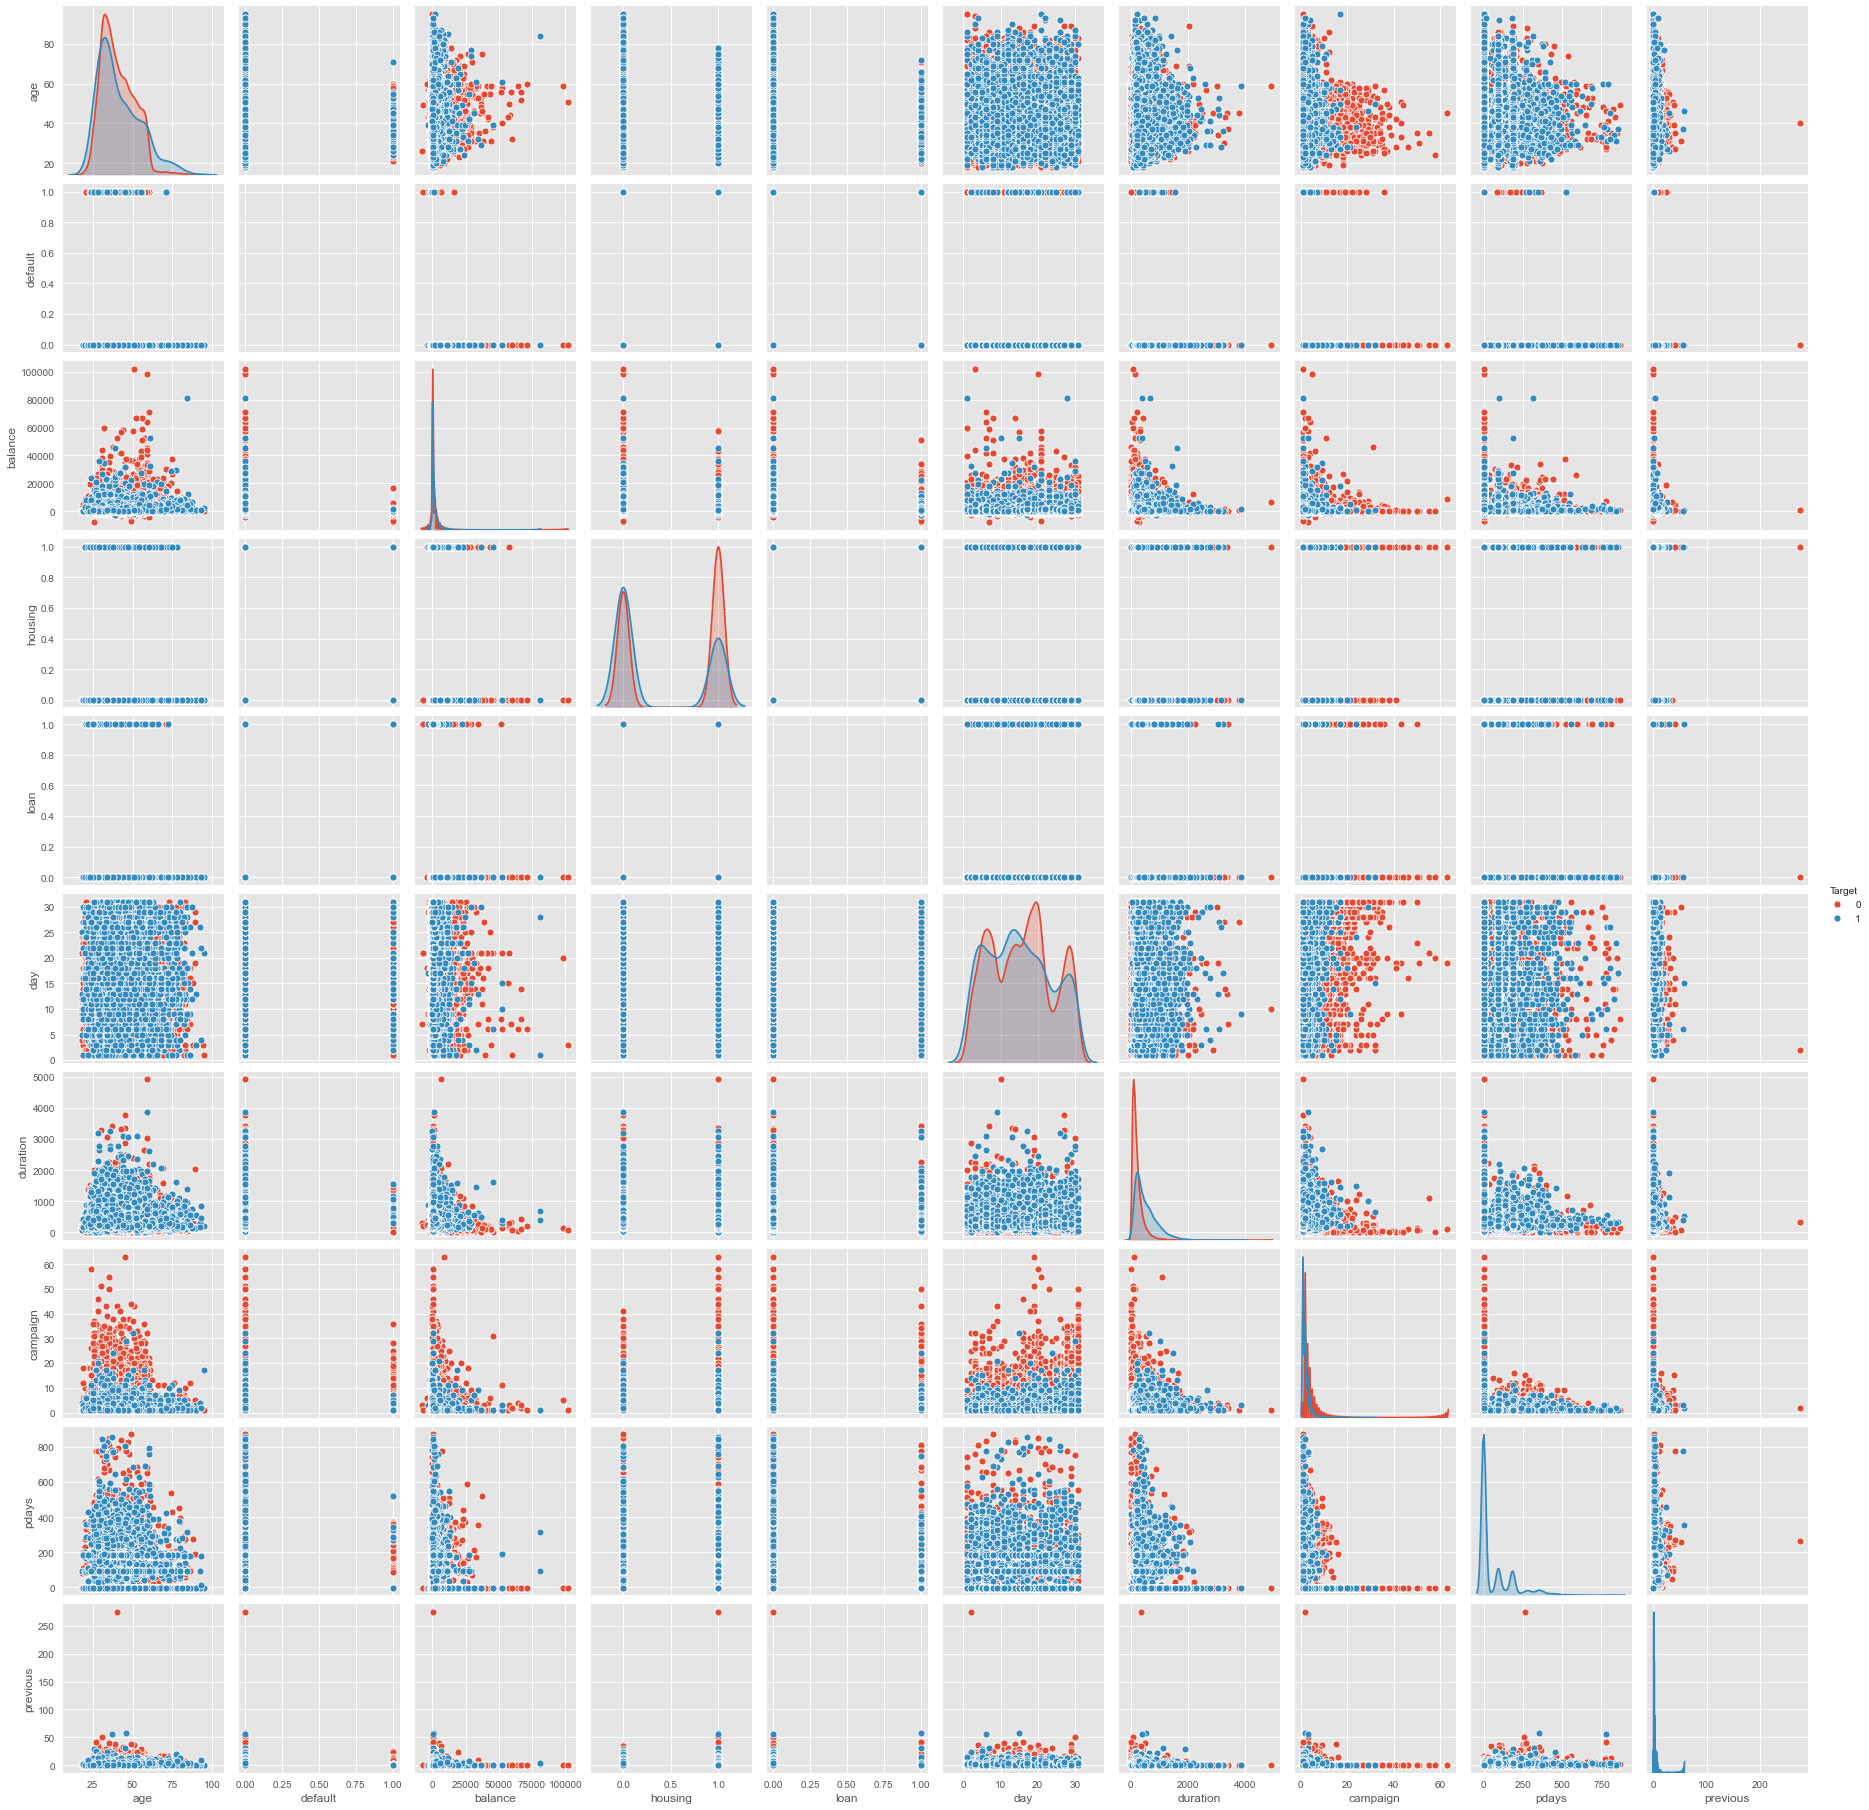

In [37]:
#By looking at the histogram,Dont see any independent variable influencing the Target Variable.0 and 1 both are overlapping in all the indivaidual variables
sns.pairplot(df,hue="Target")

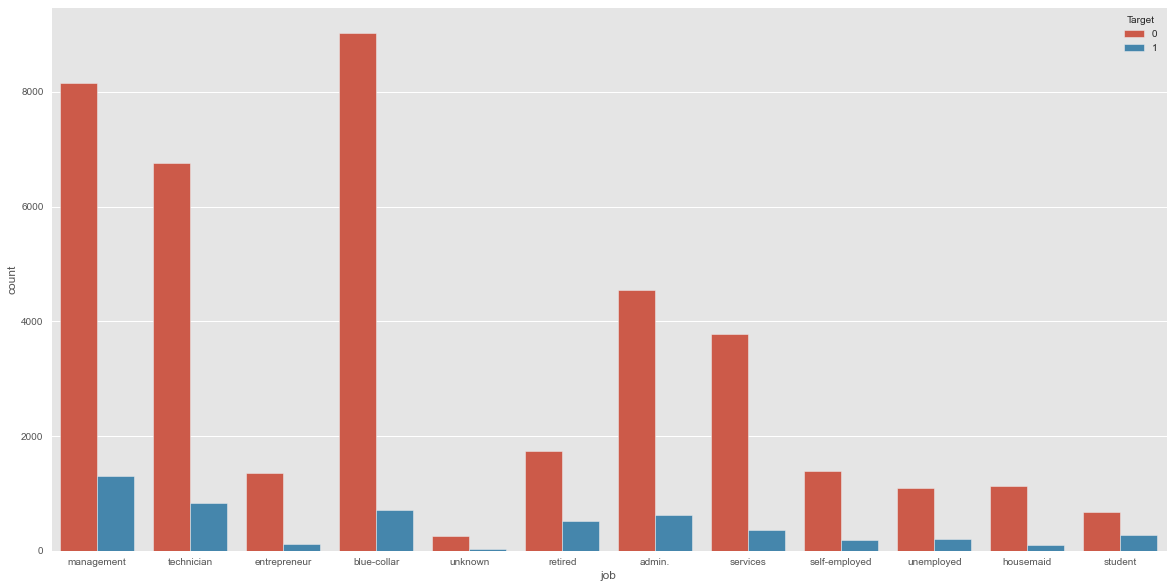

In [38]:
#Management ,Technician and Blue collar are the most who subscribed for Term Deposit
sns.countplot(x=df['job'],hue=df["Target"])

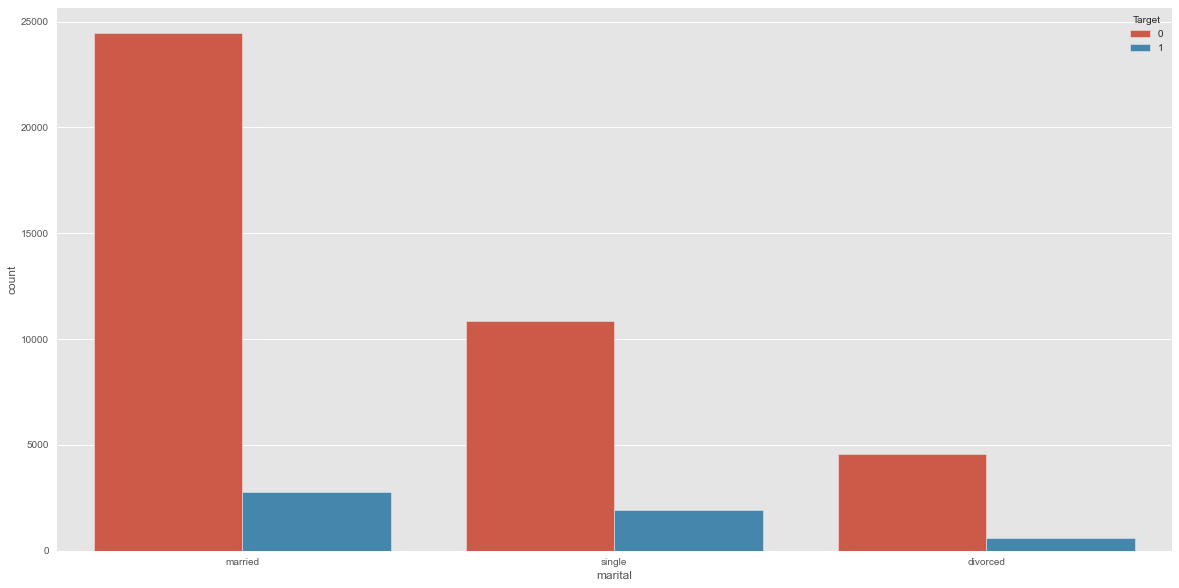

In [39]:
#Married and Singles are more in number who subscribed for Term Deposit
sns.countplot(x=df['marital'],hue=df["Target"])

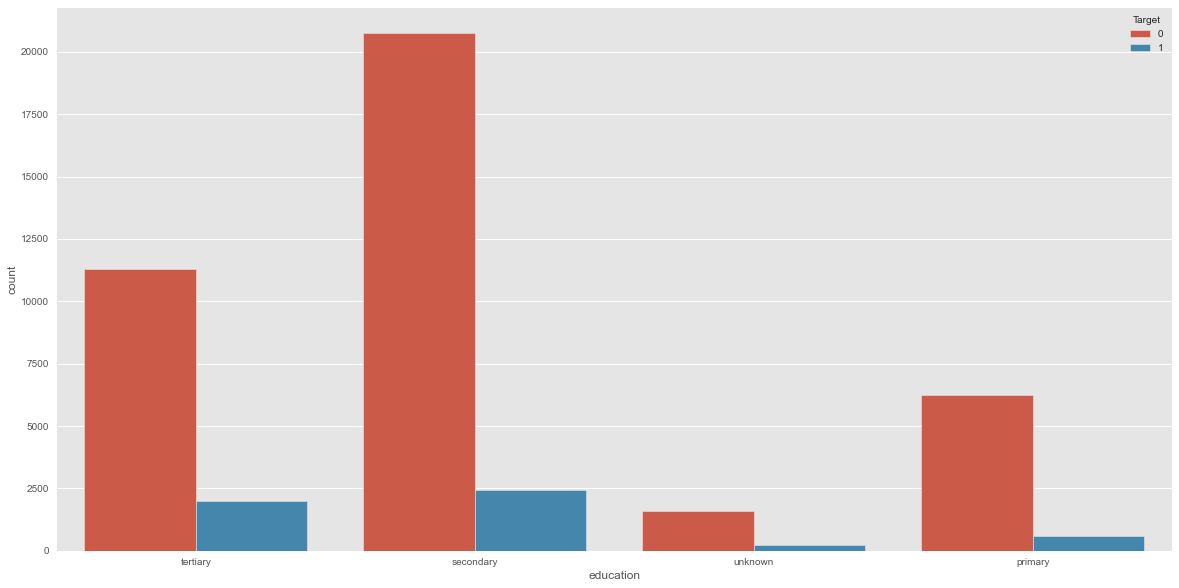

In [40]:
# People with education level of Secondary and tertiary are the most who subscribed for Term Deposit
sns.countplot(x=df['education'],hue=df["Target"])

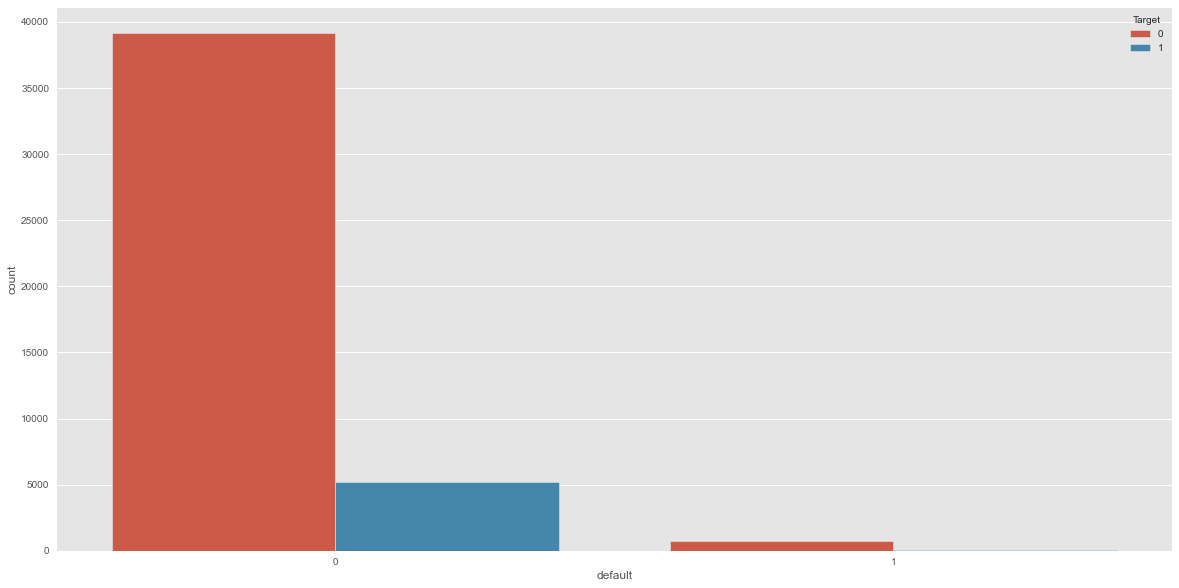

In [41]:
# People with no credit in defualt are the ones who subscribed for Term deposit.Should target the people with no default
sns.countplot(x=df['default'],hue=df["Target"])

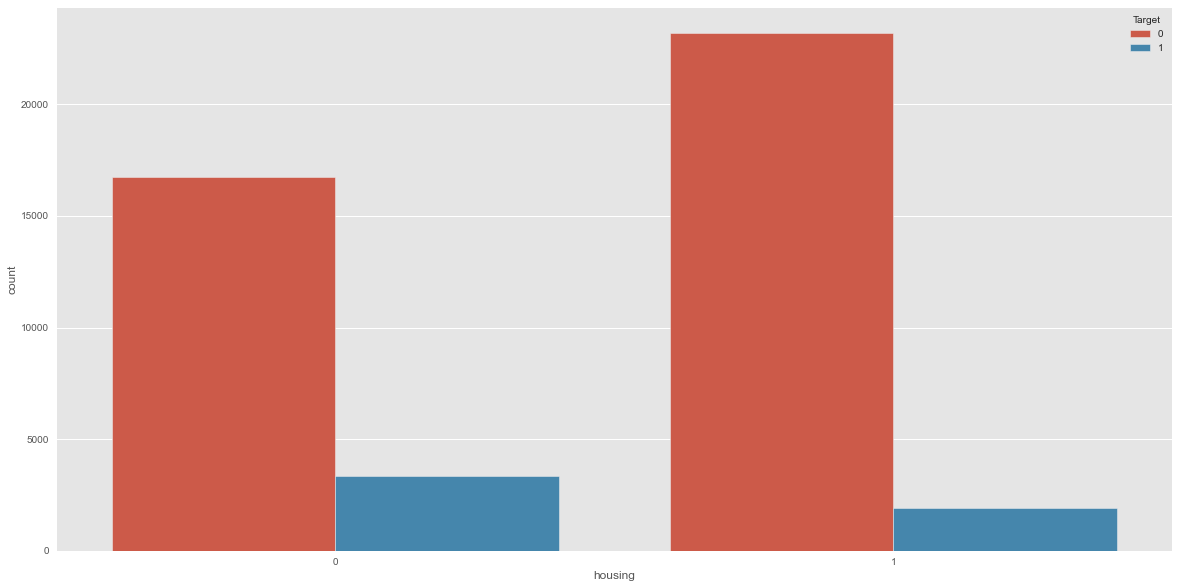

In [42]:
#More number with no hosuing loan acquired Term deposit
sns.countplot(x=df['housing'],hue=df["Target"])

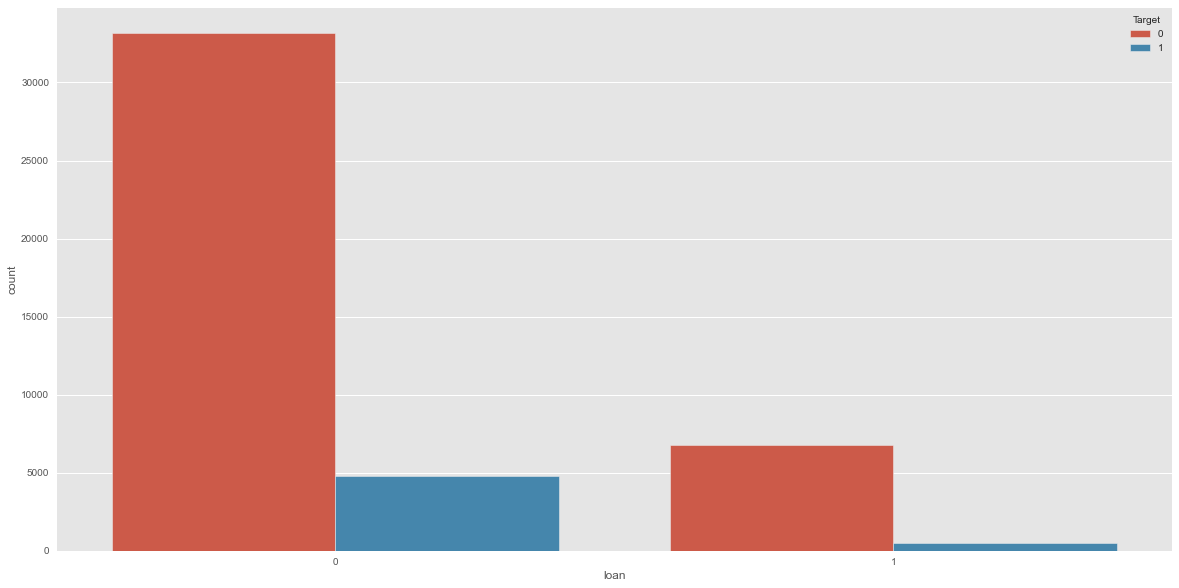

In [43]:
#Most of people with no person loan are the ones who subscribed for Term Deposit
sns.countplot(x=df['loan'],hue=df["Target"])

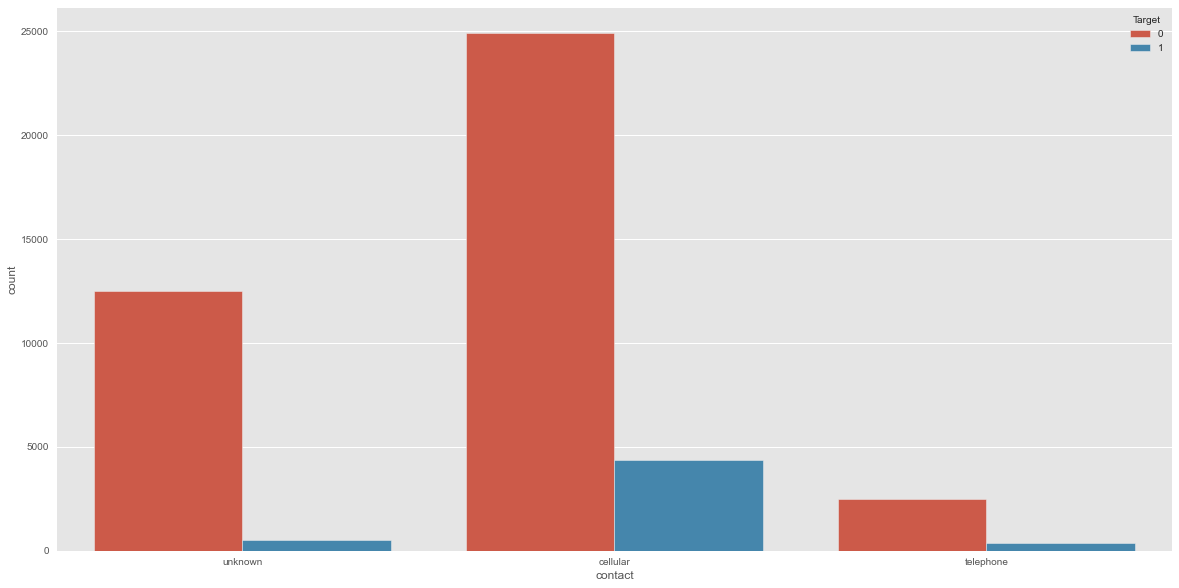

In [44]:
#Most of the people who were contacted through phone are the ones who subscribed for Term deposit
sns.countplot(x=df['contact'],hue=df["Target"])

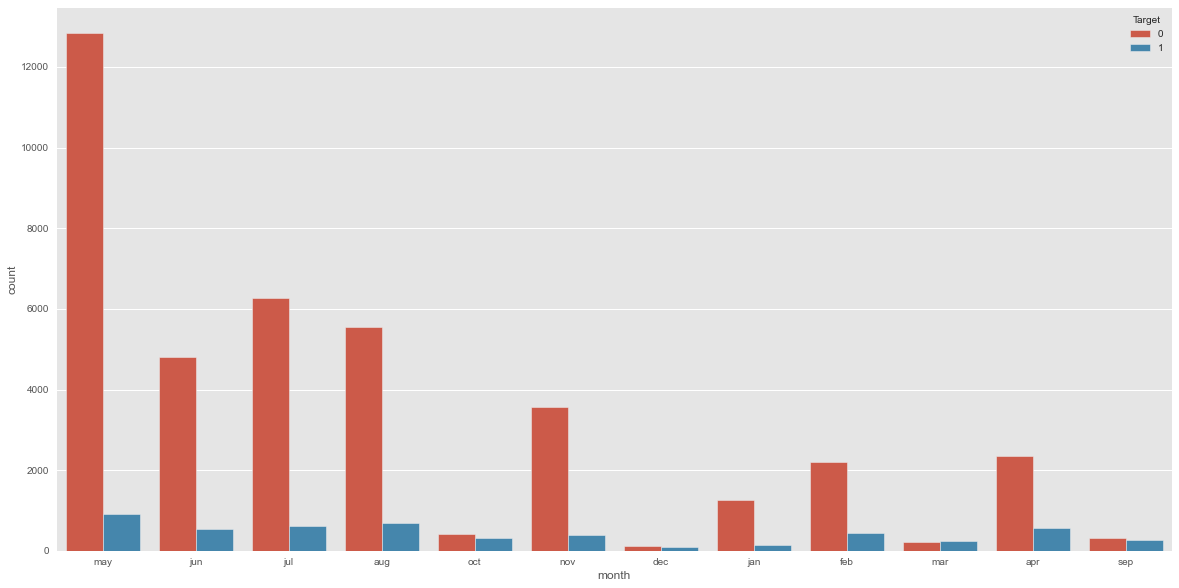

In [284]:
#Most of the people were contacted in the month of May but there is no significant pattern in terms of month .
sns.countplot(x=df['month'],hue=df["Target"])

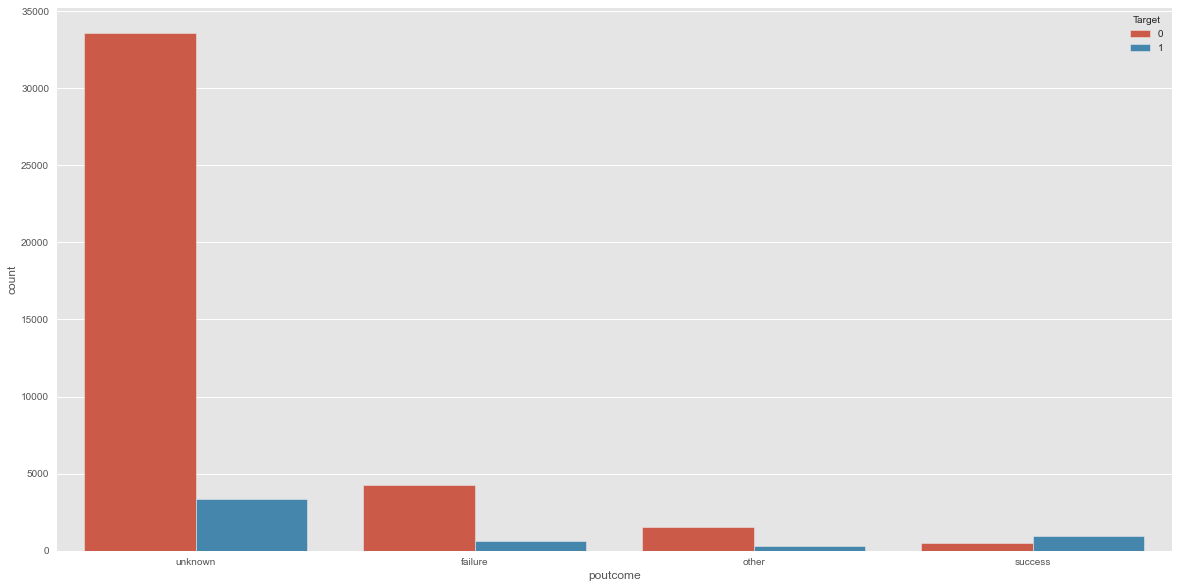

In [282]:
#Most of the previous outcome are Unknown who subscribed for Term Deposit
sns.countplot(x=df['poutcome'],hue=df["Target"])

In [203]:
#Checking relation with Age and Term Deposit
agebins = np.arange(0, 100, 5)
agelabels =np.arange(5, 100, 5)
df['binnedAge'] = pd.cut(df['age'], agebins,labels=agelabels)

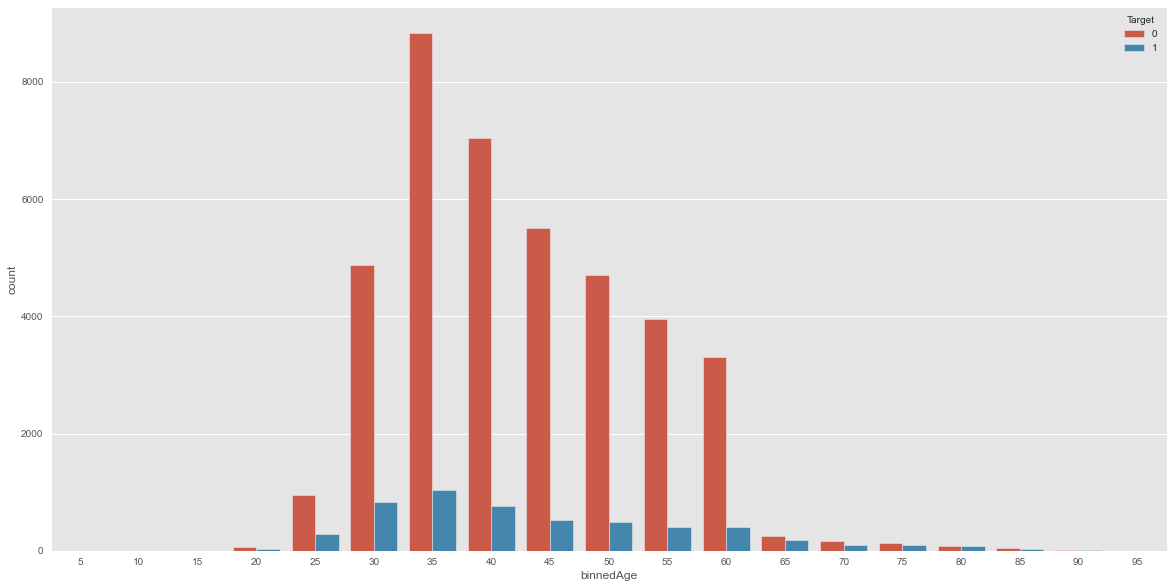

In [204]:
#Most of People who acquired Termed deposit are in the ag limit of 25 to 70.Peak being 35-40 age
sns.countplot(x=df['binnedAge'],hue=df["Target"])

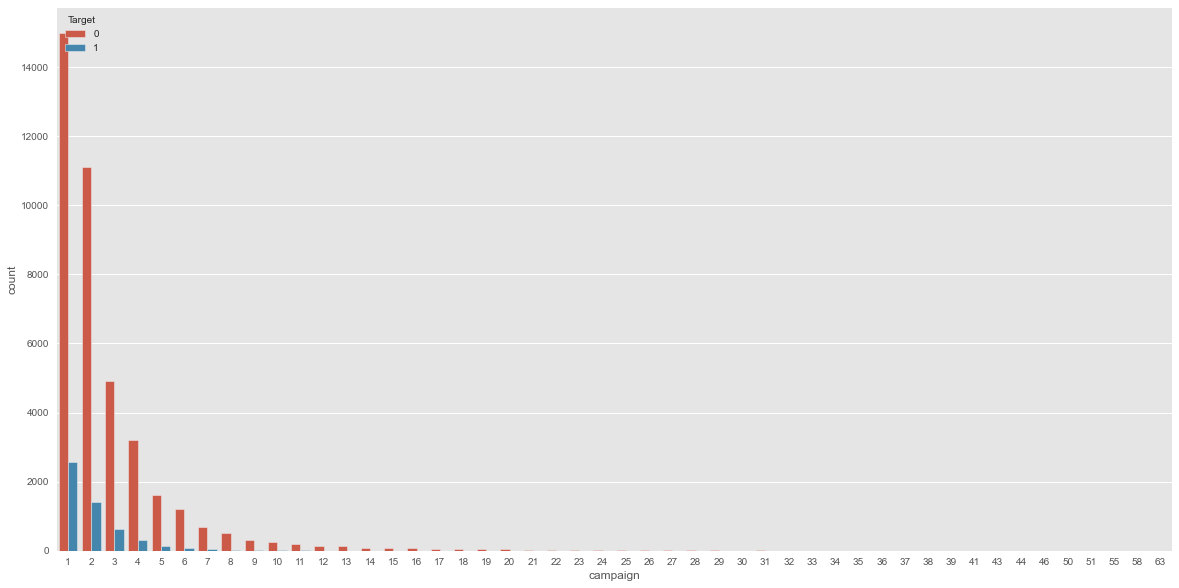

In [47]:
#Most of the people who were contacted 1,2 or 3 times during the campaign acquired Term Deposit
sns.countplot(x=df['campaign'],hue=df["Target"])

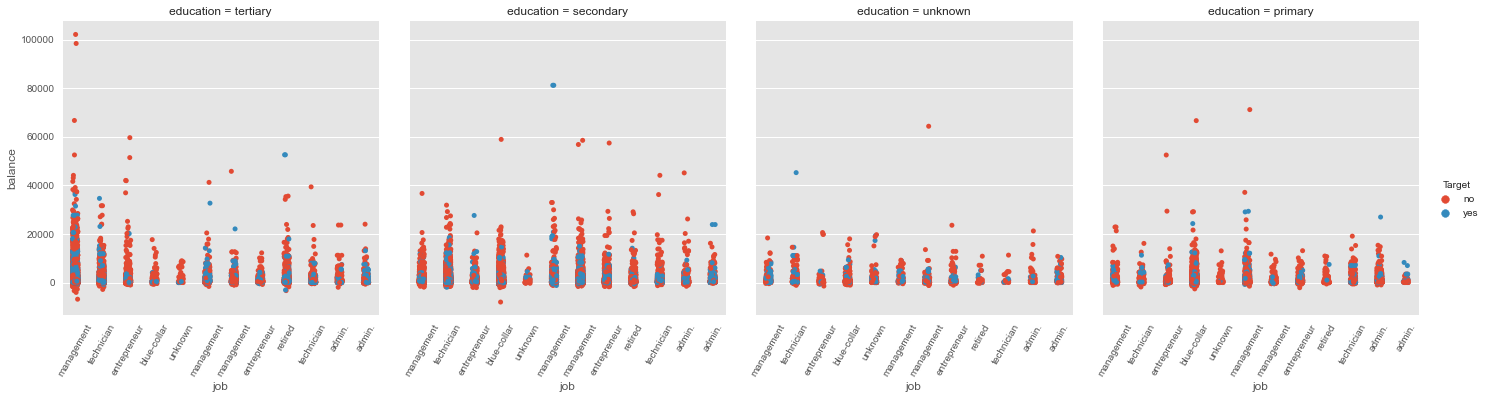

In [224]:
#Cant derive much from the below graph
g = sns.catplot(x="job", y="balance", hue="Target",
                col="education", data=df)
var=g.set_xticklabels(labels=df['job'],rotation=60)

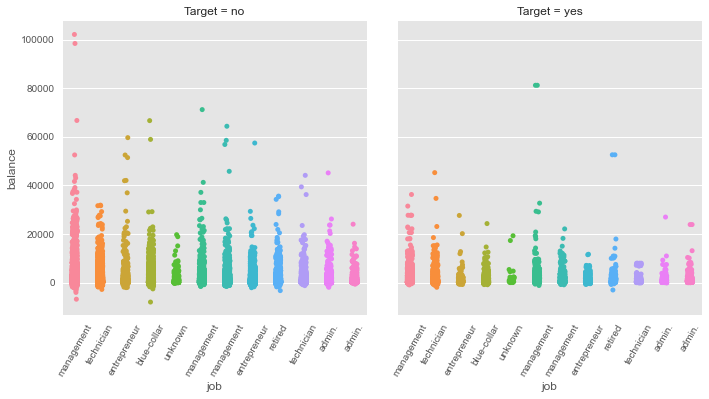

In [226]:
#Cant derive much from the below graph
g = sns.catplot(x="job", y="balance",
                col="Target", data=df)
var=g.set_xticklabels(labels=df['job'],rotation=60)

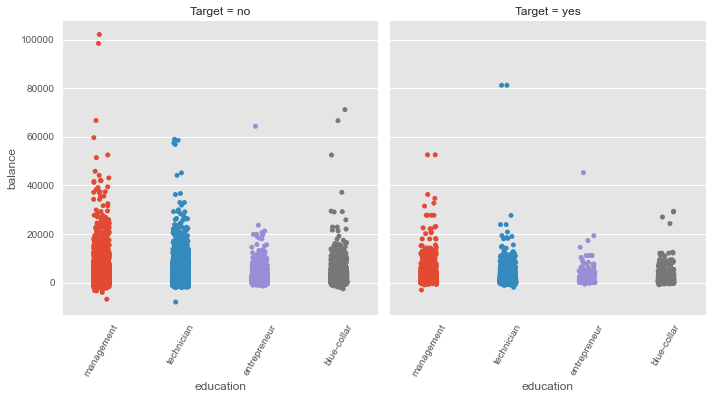

In [227]:
#Cant derive much from the below graph
g = sns.catplot(x="education", y="balance",
                col="Target", data=df)
var=g.set_xticklabels(labels=df['job'],rotation=60)

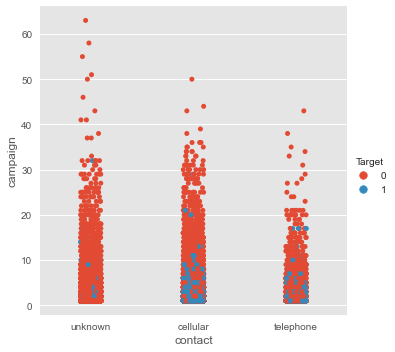

In [49]:
#We can see that most clients were contacted more than once through cellular and telephone.
g = sns.catplot(x="contact", y="campaign", hue="Target",
                data=df)

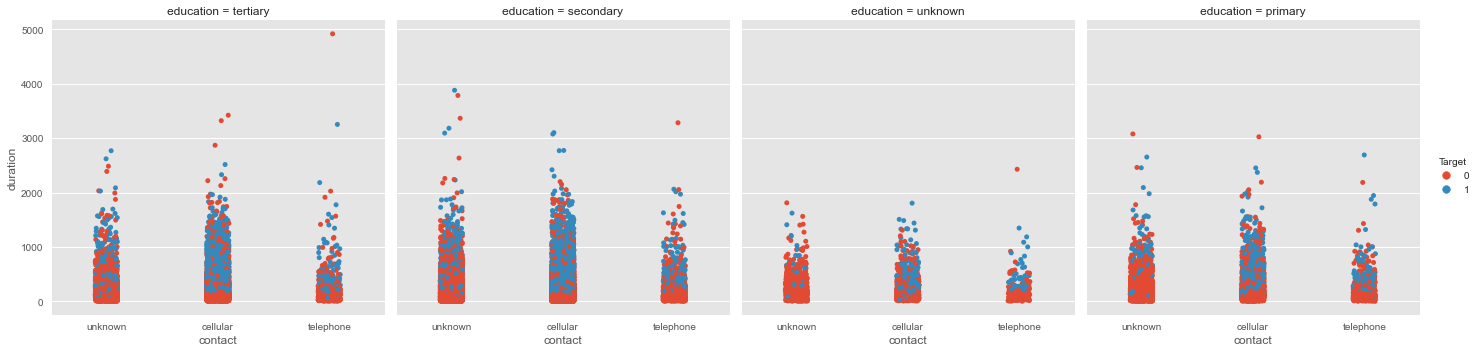

In [51]:
#Cant make much of the below graph
g = sns.catplot(x="contact", y="duration", hue="Target",col="education",
                data=df)

# Deliverable – 2 (Prepare the data for analytics)

In [303]:
#All the DataType looks fine
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45211 non-null  int64   
 1   job            45211 non-null  object  
 2   marital        45211 non-null  object  
 3   education      45211 non-null  object  
 4   default        45211 non-null  int64   
 5   balance        45211 non-null  int64   
 6   housing        45211 non-null  int64   
 7   loan           45211 non-null  int64   
 8   contact        45211 non-null  object  
 9   day            45211 non-null  int64   
 10  month          45211 non-null  object  
 11  duration       45211 non-null  int64   
 12  campaign       45211 non-null  int64   
 13  pdays          45211 non-null  int64   
 14  previous       45211 non-null  int64   
 15  poutcome       45211 non-null  object  
 16  Target         45211 non-null  int64   
 17  binnedBalance  45210 non-null  

In [306]:
df.drop(columns=['binnedBalance'],inplace=True)

# 1)Creating Dummy Values for Categotical fields

In [307]:
df = pd.get_dummies(df, columns = ['job','marital','education','contact','month','poutcome'], drop_first = True)

In [308]:
df.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  Target  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0       0                0                 0              0   
1         0       0                0                 0              0   
2         0       0                0                 1              0   
3         0       0                1                 0              0   
4         0       0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_married  \
0               0               0            0                1   
1               1               0            0                0   
2               0               0            0                1   
3               0               0            0                1   
4               0               0            1                0   

   marital_single  education_secondary  education_tertiary  education_unknown  \
0               0                    0                   1                  0   
1               1                    1                   0                  0   
2               0                    1                   0                  0   
3               0                    0                   0                  1   
4               1                    0                   0                  1   

   contact_telephone  contact_unknown  month_aug  month_dec  month_feb  \
0                  0                1          0          0          0   
1                  0                1          0          0          0   
2                  0                1          0          0          0   
3                  0                1          0          0          0   
4                  0                1          0          0          0   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0          0               0                 0                 1  
1          0          0               0                 0                 1  
2          0          0               0                 0                 1  
3          0          0               0                 0                 1  
4          0          0               0                 0                 1

# 2) Splitting the dataset into the Training set and Test set

In [309]:
# Splitting the dataset into the Training set and Test set
X=df.drop('Target',axis=1)
y=df['Target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

In [310]:
X_train.shape,X_test.shape

((31647, 42), (13564, 42))

In [311]:
y_train.shape,y_test.shape

((31647,), (13564,))

# 3)Feature Scaling 

In [312]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Deliverable – 3 (create the ensemble model)

In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [465]:
# Creating a function for evaluating model performance
def evaluate_model_performance(model, X_train, X_test,y_train,y_test):
   
    accuracy_score_train= accuracy_score(y_train,model.predict(X_train));
    accuracy_score_test= accuracy_score(y_test,model.predict(X_test));
    
    f1_score_train= f1_score(y_train,model.predict(X_train));
    f1_score_test= f1_score(y_test,model.predict(X_test));
    
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    recall_train = recall_score(y_train, model.predict(X_train))
    recall_test = recall_score(y_test, model.predict(X_test))
    
    precision_train = precision_score(y_train, model.predict(X_train))
    precision_test = precision_score(y_test, model.predict(X_test))
    
    return accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,auc_train, auc_test, recall_train, recall_test, precision_train, precision_test

In [466]:
## Define the model
lg = LogisticRegression(solver = 'liblinear',random_state=22)
## Train the model
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [467]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, lg.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11639  330
1             1036  559

In [468]:
# Produce test set performance metrics
scores = evaluate_model_performance(lg, X_train, X_test,y_train,y_test)

# Store results in a dataframe for comparison
resultsmatrix = pd.DataFrame({'Model': ['Logistic Regression'],
                        'Accuracy Train':scores[0],
                        'Accuracy Test':scores[1],
                        'F1 Train':scores[2],
                        'F1 Test':scores[3],
                       'AUC Train': scores[4],
                       'AUC Test': scores[5],
                       'Recall Train': scores[6],
                       'Recall Test': scores[7],
                       'Precision Train': scores[8],
                       'Precision Test': scores[9]})

resultsmatrix

Model  Accuracy Train  Accuracy Test  F1 Train  F1 Test  \
0  Logistic Regression         0.90359        0.89929   0.46558  0.45008   

   AUC Train  AUC Test  Recall Train  Recall Test  Precision Train  \
0    0.91113   0.89956       0.35977      0.35047          0.65955   

   Precision Test  
0         0.62880

In [97]:
#Fine tuning SVC to see if we have optimal parameters.Couldnt run for different parameters cos of computer limitation
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10,100)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
grid_search = GridSearchCV(lg, hyperparameters, cv=5, verbose=0)

grid_search = grid_search.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 2.7825594022071245, 'penalty': 'l2'}
accuracy : 0.9033401002481867


In [469]:
lg_grid = LogisticRegression(solver = 'liblinear',C= 2.7825594022071245, penalty = 'l2',random_state=22)
## Train the model
lg_grid.fit(X_train, y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [470]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, lg_grid.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11639  330
1             1036  559

In [471]:
# Produce test set performance metrics
scores = evaluate_model_performance(lg_grid, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Logistic Regression - With Grid Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                                  
                            
                                 ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                      Logistic Regression         0.90359        0.89929   
1  Logistic Regression - With Grid Search          0.90359        0.89929   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880

In [325]:
from sklearn.model_selection import RandomizedSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0,0.5, 4, 10,100)

# Create hyperparameter options
param_distributions = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
randomsearch = RandomizedSearchCV(lg, param_distributions, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

randomsearch = randomsearch.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",randomsearch.best_params_)
print("accuracy :",randomsearch.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    3.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.1s finished


tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 1.0}
accuracy : 0.9088819482067801


In [472]:
lg_randomSearch = LogisticRegression(solver = 'liblinear',C= 1.0, penalty = 'l1',random_state=22)
## Train the model
lg_randomSearch.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=22, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [473]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, lg_randomSearch.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11639  330
1             1036  559

In [474]:
# Produce test set performance metrics
scores = evaluate_model_performance(lg_randomSearch, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Logistic Regression - With Random Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880

# 2) Decision Tree Model

In [475]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=22)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [476]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, dTree.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11039  930
1              802  793

In [477]:
# Produce test set performance metrics
scores = evaluate_model_performance(dTree, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Decision Tree ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024

In [479]:
#Check HyperParameter Using GridSearch
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9,10,15,20,30,40,50,100],
             'max_features':[None,"auto", "sqrt", "log2"],
             'min_samples_leaf' :[1,10,20,30]}
clf = GridSearchCV(dTree, tree_para, cv=5)
clf.fit(X_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=22,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [480]:
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 30}
accuracy : 0.9028030353519508


In [481]:
dTree_gridSearch = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=30,random_state=22)
dTree_gridSearch.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [482]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, dTree_gridSearch.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11555  414
1              977  618

In [483]:
# Produce test set performance metrics
scores = evaluate_model_performance(dTree_gridSearch, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Decision Tree with Grid Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884

In [349]:
#Check HyperParameter Using RandomizedSearchCV
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8,9,10,15,20,30,40,50,100],
             'max_features':[None,"auto", "sqrt", "log2"],
             'min_samples_leaf' :[1,10,20,30]}
dtree_random = RandomizedSearchCV(dTree, param_distributions=tree_para, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
dtree_random.fit(X_train, y_train )


print("tuned hpyerparameters :(best parameters) ",dtree_random.best_params_)
print("accuracy :",dtree_random.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 20, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
accuracy : 0.8877014130014722


[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    2.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished


In [369]:
dTree_randomizedSearchCV = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=20,random_state=22)
dTree_randomizedSearchCV.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [370]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, dTree_randomizedSearchCV.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11543  426
1              931  664

In [484]:
# Produce test set performance metrics
scores = evaluate_model_performance(dTree_randomizedSearchCV, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Decision Tree with Randomized Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917

In [377]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [378]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, rfcl.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11592  377
1              966  629

In [485]:
scores = evaluate_model_performance(rfcl, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Random Forest ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   
6                             Random Forest          1.00000        0.90099   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6   1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917  
6          1.00000         0.62525

In [125]:
#Check HyperParameter Using GridSearch
from scipy.stats import randint
randomtree_para ={'max_depth':[3,5,10,50,100,None],
              'n_estimators':[10,50,100,200],
              'max_features': [None,'auto', 'sqrt', 'log2'],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[5,10,20,30]#,
                 # 'max_samples':[100,200,300]
              }

clf = GridSearchCV(rfcl, randomtree_para, cv=5)
clf.fit(X_train, y_train )
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
accuracy : 0.9052044289719806


In [390]:
rfcl_gridsearch = RandomForestClassifier(criterion = 'gini',bootstrap=False,max_features='auto',n_estimators=50) 
#rfcl_gridsearch = RandomForestClassifier()
rfcl_gridsearch = rfcl_gridsearch.fit(X_train, y_train)
#dTree_gridSearch.fit(X_train, y_train)

In [391]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, rfcl_gridsearch.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11573  396
1              946  649

In [486]:
scores = evaluate_model_performance(rfcl_gridsearch, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Random Forest with Grid Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   
6                             Random Forest          1.00000        0.90099   
7            Random Forest with Grid Search          1.00000        0.90091   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6   1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7   1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917  
6          1.00000         0.62525  
7          1.00000         0.61482

In [393]:
est = RandomForestClassifier(n_jobs=-1)

rf_p_dist ={'max_depth':[3,5,10,50,100,None],
              'n_estimators':[10,50,100,200,300,400,500],
              'max_features': [None,'auto', 'sqrt', 'log2'],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[5,10,20,30]#,
                 # 'max_samples':[100,200,300]
              }
rdmsearch = RandomizedSearchCV(est, param_distributions=rf_p_dist,
                                  n_jobs=-1, n_iter=5, cv=10)
  
rdmsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [394]:
print("tuned hpyerparameters :(best parameters) ",rdmsearch.best_params_)
print("accuracy :",rdmsearch.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 50, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}
accuracy : 0.9055522535315346


In [395]:
rfcl_randomsearch = RandomForestClassifier(criterion = 'gini',bootstrap=False,max_features='sqrt',n_estimators=50,min_samples_leaf=5,max_depth=50) 
#rfcl_gridsearch = RandomForestClassifier()
rfcl_randomsearch = rfcl_gridsearch.fit(X_train, y_train)

In [396]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, rfcl_randomsearch.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11548  421
1              923  672

In [397]:
scores = evaluate_model_performance(rfcl_randomsearch, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Random Forest with Random Search ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   
6                             Random Forest          1.00000        0.90099   
7            Random Forest with Grid Search          1.00000        0.90106   
8          Random Forest with Random Search          1.00000        0.90091   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6   1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7   1.00000  0.49167    1.00000   0.91959       1.00000      0.40690   
8   1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917  
6          1.00000         0.62525  
7          1.00000         0.62105  
8          1.00000         0.61482

In [487]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier()
bgcl = bgcl.fit(X_train, y_train)

scores = evaluate_model_performance(bgcl, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Bagging Classifier",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   
6                             Random Forest          1.00000        0.90099   
7            Random Forest with Grid Search          1.00000        0.90091   
8                         Bagging Classifier         0.99216        0.89760   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6   1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7   1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8   0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917  
6          1.00000         0.62525  
7          1.00000         0.61482  
8          0.99257         0.59180

In [404]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, bgcl.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11513  456
1              957  638

In [488]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier()
abcl = abcl.fit(X_train, y_train)

scores = evaluate_model_performance(abcl, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["AdaBoostClassifier",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                        Logistic Regression         0.90359        0.89929   
1    Logistic Regression - With Grid Search          0.90359        0.89929   
2  Logistic Regression - With Random Search          0.90353        0.89929   
3                             Decision Tree          1.00000        0.87231   
4            Decision Tree with Grid Search          0.90808        0.89745   
5      Decision Tree with Randomized Search          0.91219        0.89996   
6                             Random Forest          1.00000        0.90099   
7            Random Forest with Grid Search          1.00000        0.90091   
8                         Bagging Classifier         0.99216        0.89760   
9                         AdaBoostClassifier         0.90334        0.89664   

   F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0   0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1   0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2   0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3   1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4   0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5   0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6   1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7   1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8   0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9   0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   

   Precision Train  Precision Test  
0          0.65955         0.62880  
1          0.65955         0.62880  
2          0.65922         0.62880  
3          1.00000         0.46024  
4          0.66582         0.59884  
5          0.68366         0.60917  
6          1.00000         0.62525  
7          1.00000         0.61482  
8          0.99257         0.59180  
9          0.63895         0.59797

In [406]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, abcl.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11573  396
1             1006  589

In [489]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)


scores = evaluate_model_performance(gbcl, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["GradientBoostingClassifier",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286

In [408]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, gbcl.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11574  395
1              941  654

In [490]:
from xgboost import XGBClassifier

XGBClass=  XGBClassifier()
XGBClass = XGBClass.fit(X_train, y_train)


scores = evaluate_model_performance(XGBClass, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["XGBClassifier",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820

# Creating Pipeline to check Best Model 

In [411]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 50, 100],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                 {"classifier": [AdaBoostClassifier()],
                 "classifier__n_estimators": [10,20, 50, 100],
                 "classifier__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,1.0 ] 
                 },
                {"classifier": [GradientBoostingClassifier()],
                 "classifier__n_estimators": [10, 50, 100],
                 "classifier__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
                },
                {
                  "classifier": [XGBClassifier()] ,
                    "classifier__n_estimators": [10, 50, 100,200,300,400,500],
                 "classifier__learning_rate"    : [0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                 "classifier__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20,50,60,70],
                 "classifier__min_child_weight" : [ 1, 3, 5, 7 ],
                 "classifier__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "classifier__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
                },
                {
                  "classifier": [BaggingClassifier()] ,
                    "classifier__n_estimators": [10, 50, 100],
                    "classifier__max_samples": [0.7,0.8]
                }


            ]
# create a gridsearch of the pipeline, the fit the best model
#gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
#best_model = gridsearch.fit(X_train,y_train)
random_search=RandomizedSearchCV(pipe,param_distributions=grid_param,n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)
best_model=random_search.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
print("The best model params are:",random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   42.8s remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   52.1s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


Pipeline(memory=None,
         steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.25,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=0, num_parallel_tree=1,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))],
         verbose=False)
The mean accuracy of 

In [491]:
XGBclass_tuned =XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.4, gamma=0.1,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.25, max_delta_step=None, max_depth=6,
              min_child_weight=7, missing=np.nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
XGBclass_tuned = XGBclass_tuned.fit(X_train, y_train)


scores = evaluate_model_performance(XGBclass_tuned, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["XGBClassifier Random Search",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206

In [414]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, XGBclass_tuned.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11466  503
1              834  761

In [415]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
print(cross_val_score(knnclassifier,X_train,y_train,cv=10,scoring='accuracy').mean())

0.895629964270236


In [492]:
knnclassifier.fit(X_train,y_train)
scores = evaluate_model_performance(knnclassifier, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["knnclassifier ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751

In [230]:
#cross_val_score on DecisionTree
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=0)
print(cross_val_score(decisionTree,X_train,y_train,cv=10,scoring='accuracy').mean())

0.8719311647823161


In [231]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
print(cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy').mean())

0.905552243545575


In [237]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
logreg = LogisticRegression()
print(cross_val_score(logreg,X_train_poly,y_train,cv=10,scoring='accuracy').mean())

0.9041303227661908


In [493]:
logreg.fit(X_train,y_train)
scores = evaluate_model_performance(logreg, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Polynomial Logistic Regression ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   
14            Polynomial Logistic Regression          0.90359        0.89929   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   
14   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751  
14          0.65955         0.62880

In [233]:
#cross_val_score on LogRegression
from sklearn.svm import SVC
svcClassifier = SVC()
print(cross_val_score(svcClassifier,X_train,y_train,cv=10,scoring='accuracy').mean())

0.9044461986447055


In [494]:
svcClassifier.fit(X_train,y_train)
scores = evaluate_model_performance(logreg, X_train, X_test,y_train,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Scalar Vector Classifier ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   
14            Polynomial Logistic Regression          0.90359        0.89929   
15                  Scalar Vector Classifier          0.90359        0.89929   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   
14   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
15   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751  
14          0.65955         0.62880  
15          0.65955         0.62880

# Conclusion of Models Based on Result Matrix

Here more focus should be towards recall because our target variable is acquiring 'Term Deposit' , i.e whether the customer is accepting the term deposit loan or not. 
And the bank wants more people to accept term deposit i.e. less number of False Negative, so that bank doesn't lose real customers who want to take Term deposit. 
Hence the focus should be on increasing Recall.

From the above,it can be seen that XGBClassifier is a  good model followed by Decsion Tree model as the Recall  is better on Test set for these  models compared to others

# Class Imbalance - Using SMOTE

Since the Recall percentage is not that good Will try to perform Oversampling of Minority class using SMOTE(Synthetic Minority OverSampling Technique)

In [433]:
!pip install -U imbalanced-learn

In [434]:
#WIll have to check if we rectify the Class Imbalance will the Recall improve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams

In [436]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 27953, 1: 3694}

In [438]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [439]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 27953, 1: 27953}

In [442]:
xgbClass_smothe= XGBClassifier().fit(x_train_res, y_train_res)

In [445]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, xgbClass_smothe.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11347  622
1              701  894

In [495]:
scores = evaluate_model_performance(xgbClass_smothe, x_train_res, X_test,y_train_res,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["XGBClassifier - Smothe  ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   
14            Polynomial Logistic Regression          0.90359        0.89929   
15                  Scalar Vector Classifier          0.90359        0.89929   
16                   XGBClassifier - Smothe           0.97099        0.90246   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   
14   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
15   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
16   0.97084  0.57473    0.99691   0.92431       0.96594      0.56050   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751  
14          0.65955         0.62880  
15          0.65955         0.62880  
16          0.97579         0.58971

# Using STACKING Algorithm on entire dataset to check if it can improve the recall rate

>lr 0.208 (0.025)
>knn 0.275 (0.018)
>cart 0.482 (0.017)
>svm 0.009 (0.004)
>bayes 0.506 (0.016)
>stacking 0.267 (0.029)


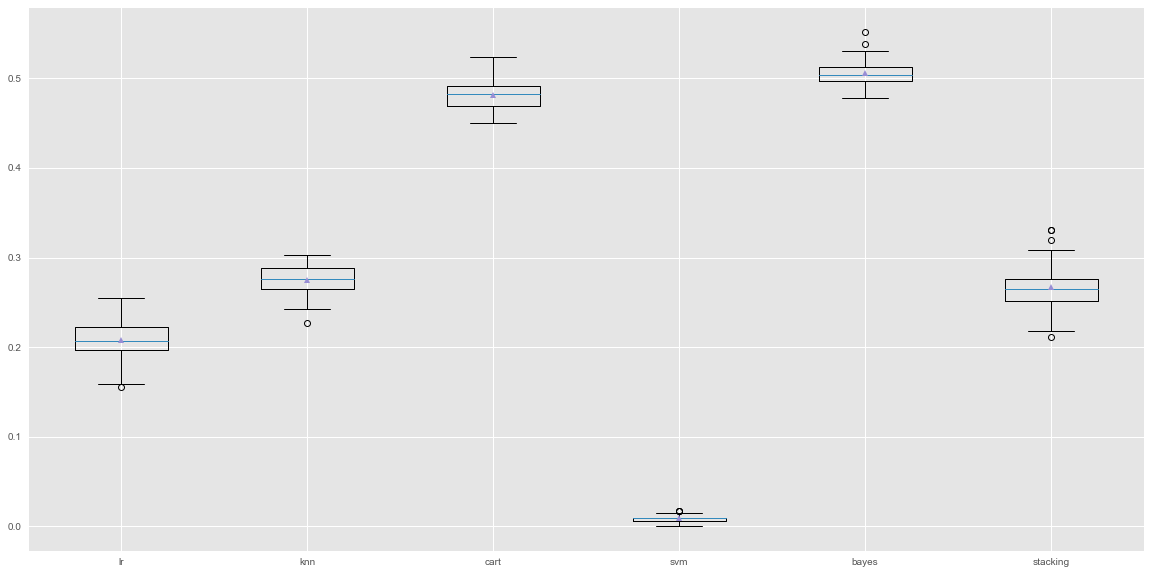

In [456]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = XGBClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Using STACKING Algorithm on SMOTE dataset to check if it can improve the recall rate

>lr 0.848 (0.007)
>knn 0.990 (0.002)
>cart 0.921 (0.006)
>svm 0.952 (0.004)
>bayes 0.530 (0.009)
>stacking 0.969 (0.003)


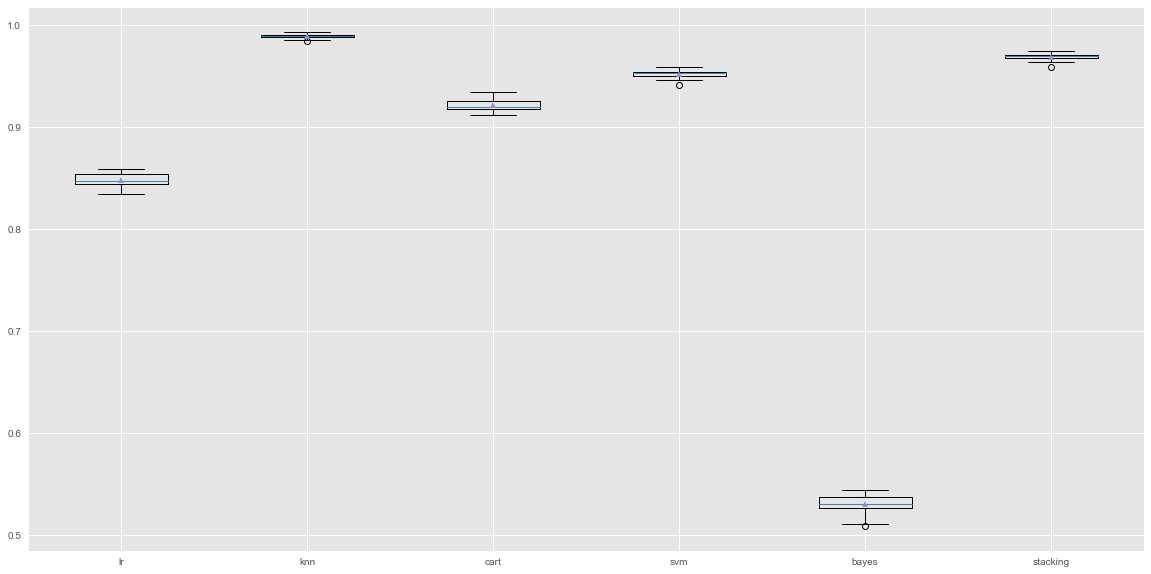

In [458]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = XGBClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_train_res, y_train_res, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

From the above we can see ,the Recall rate improved drastically on SMOTE train dataset on most of the models.WIll choose KNN and Stacking to check my predictions

Recall rate on Actual Dataset
>lr 0.208 (0.025)
>knn 0.275 (0.018)
>cart 0.482 (0.017)
>svm 0.009 (0.004)
>bayes 0.506 (0.016)
>stacking 0.267 (0.029)

Recall rate on SMOTE Dataset
>lr 0.848 (0.007)
>knn 0.990 (0.002)
>cart 0.921 (0.006)
>svm 0.952 (0.004)
>bayes 0.530 (0.009)
>stacking 0.969 (0.003)

# SMOTE on KNN and STACKING

In [499]:
knn=KNeighborsClassifier().fit(x_train_res,y_train_res)

In [500]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, knn.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0     1
Actual                  
0            10243  1726
1              514  1081

In [496]:
scores = evaluate_model_performance(knn, x_train_res, X_test,y_train_res,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["KNN - Smote dataset ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   
14            Polynomial Logistic Regression          0.90359        0.89929   
15                  Scalar Vector Classifier          0.90359        0.89929   
16                   XGBClassifier - Smothe           0.97099        0.90246   
17                       KNN - Smote dataset          0.94389        0.83486   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   
14   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
15   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
16   0.97084  0.57473    0.99691   0.92431       0.96594      0.56050   
17   0.94674  0.49114    0.99701   0.82175       0.99735      0.67774   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751  
14          0.65955         0.62880  
15          0.65955         0.62880  
16          0.97579         0.58971  
17          0.90101         0.38511

In [497]:
stacking=get_stacking().fit(x_train_res,y_train_res)

In [501]:
# Produce a confusion matrix with actual and predicted outcomes
pd.crosstab(y_test, stacking.predict(X_test), rownames = ['Actual'], colnames = ['Predictions'])

Predictions      0    1
Actual                 
0            11149  820
1              799  796

In [498]:
scores = evaluate_model_performance(stacking, x_train_res, X_test,y_train_res,y_test)

resultsmatrix.loc[len(resultsmatrix)] = ["Stacking - Smote dataset ",
                                  scores[0],
                                  scores[1],
                                  scores[2],
                                  scores[3],
                                  scores[4],
                                  scores[5],
                                  scores[6],
                                 scores[7],
                                 scores[8],
                                 scores[9]
                            ]

resultsmatrix

Model  Accuracy Train  Accuracy Test  \
0                         Logistic Regression         0.90359        0.89929   
1     Logistic Regression - With Grid Search          0.90359        0.89929   
2   Logistic Regression - With Random Search          0.90353        0.89929   
3                              Decision Tree          1.00000        0.87231   
4             Decision Tree with Grid Search          0.90808        0.89745   
5       Decision Tree with Randomized Search          0.91219        0.89996   
6                              Random Forest          1.00000        0.90099   
7             Random Forest with Grid Search          1.00000        0.90091   
8                          Bagging Classifier         0.99216        0.89760   
9                          AdaBoostClassifier         0.90334        0.89664   
10                 GradientBoostingClassifier         0.91386        0.90143   
11                              XGBClassifier         0.95690        0.90482   
12                XGBClassifier Random Search         0.95715        0.90143   
13                             knnclassifier          0.91848        0.89111   
14            Polynomial Logistic Regression          0.90359        0.89929   
15                  Scalar Vector Classifier          0.90359        0.89929   
16                   XGBClassifier - Smothe           0.97099        0.90246   
17                       KNN - Smote dataset          0.94389        0.83486   
18                  Stacking - Smote dataset          0.99109        0.88064   

    F1 Train  F1 Test  AUC Train  AUC Test  Recall Train  Recall Test  \
0    0.46558  0.45008    0.91113   0.89956       0.35977      0.35047   
1    0.46558  0.45008    0.91111   0.89953       0.35977      0.35047   
2    0.46504  0.45008    0.91114   0.89957       0.35923      0.35047   
3    1.00000  0.47800    1.00000   0.70974       1.00000      0.49718   
4    0.52005  0.47050    0.87744   0.86261       0.42664      0.38746   
5    0.55069  0.49460    0.90380   0.88304       0.46102      0.41630   
6    1.00000  0.48366    1.00000   0.92429       1.00000      0.39436   
7    1.00000  0.50000    1.00000   0.92004       1.00000      0.42132   
8    0.96552  0.48877    0.99963   0.89256       0.93990      0.41630   
9    0.48838  0.45659    0.91653   0.90332       0.39524      0.36928   
10   0.55135  0.49452    0.93394   0.91900       0.45344      0.41003   
11   0.79822  0.55189    0.98308   0.92814       0.73037      0.49843   
12   0.79965  0.53235    0.98235   0.92476       0.73254      0.47712   
13   0.55594  0.40178    0.95547   0.80253       0.43720      0.31097   
14   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
15   0.46558  0.45008    0.91112   0.89954       0.35977      0.35047   
16   0.97084  0.57473    0.99691   0.92431       0.96594      0.56050   
17   0.94674  0.49114    0.99701   0.82175       0.99735      0.67774   
18   0.99114  0.49580    0.99979   0.88142       0.99599      0.49906   

    Precision Train  Precision Test  
0           0.65955         0.62880  
1           0.65955         0.62880  
2           0.65922         0.62880  
3           1.00000         0.46024  
4           0.66582         0.59884  
5           0.68366         0.60917  
6           1.00000         0.62525  
7           1.00000         0.61482  
8           0.99257         0.59180  
9           0.63895         0.59797  
10          0.70319         0.62286  
11          0.87997         0.61820  
12          0.88029         0.60206  
13          0.76323         0.56751  
14          0.65955         0.62880  
15          0.65955         0.62880  
16          0.97579         0.58971  
17          0.90101         0.38511  
18          0.98633         0.49257

# Conclusion

Here more focus should be towards recall because our target variable is acquiring 'Term Deposit' , i.e whether the customer is accepting the term deposit loan or not. 
And the bank wants more people to accept term deposit i.e. less number of False Negative, so that bank doesn't lose real customers who want to take Term deposit. 
Hence the focus should be on increasing Recall.

From the above,it can be seen that (KNN - Smote dataset) is a  good model followed by (XGBClassifier - Smothe) as the Recall  is better on Test set for these  models compared to others